# <u>**Descarga de datos desde APIs públicas**</u>
## **1** <u>**Introducción**</u>
<p align = "justify">
Por medio de la API de Kaggle, vamos a intentar descargar datasets para el posterior uso de su información. Para esto, en primer lugar vamos a instalar los archivos necesarios de esta API:
</p>

### **1.1** <u>**Contexto empresarial**</u>
<p align = "justify">
En los últimos años, ha surgido un interés creciente en el café de especialidad y el movimiento de café de tercera ola. Esto se enfoca en la calidad, origen, tostado y preparación cuidadosa del café. Muchas cafeterías de especialidad ofrecen cafés de origen único y métodos de preparación especializados.

En el mercado de café de Estados Unidos, destacan cadenas populares como Starbucks, Dunkin' Donuts y Peet's Coffee, con una presencia nacional. Starbucks es la cadena más grande y reconocida, con miles de ubicaciones en todo el país.

Las ventas en el sector de cafeterías en Estados Unidos han experimentado un crecimiento constante en la última década, alcanzando los 47.500 millones de dólares en 2019. Además, el número de cafeterías en el país ha aumentado, con aproximadamente 35.616 tiendas en 2019, según la National Coffee Association.

Además de las grandes cadenas, existe una próspera escena de cafeterías independientes que se centran en la calidad del café y la experiencia del cliente. Estas cafeterías locales a menudo son elogiadas por su café artesanal y ambiente acogedor.

El presente proyecto se basa en un conjunto de datos ficticio de ventas de una cadena de cafeterías en Nueva York entre abril y marzo de 2019. Estos datos provienen de IBM como un estudio de caso y están disponibles en Kaggle a través del siguiente enlace: Enlace al proyecto: "https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/12/beanie-coffee-1113"
</p>



### **1.2** <u>**Problema comercial**</u>
<p align = "justify">
La tarea principal es, por medio del enrenamiento de un modelo de machine learning, intentar determinar el tipo de producto que el cliente desea ordenar. Para esto primero se plantea un formateo las variables proporcionadas y una serie de visualizaciones que suministren información para entender mejor el dataset.
</p>

### **1.3** <u>**Contexto analítico**</u>
<p align = "justify">
Por medio de una descarga con la API de Kaggle se proporciona un archivo CSV que contiene detalles comerciales (ficticias), de ventas entre abril y marzo del 2019 de una cadena comercial de bebidas de cafetería, con tres ubicaciones en la ciudad de Nueva York, EEUU. Entre estos se podemos ver las siguientes variables: transaction_id, transaction_date, transaction_time, sales_outlet_id, staff_id, customer_id, instore_yn, order, line_item_id, product_id, quantity, line_item_amount, unit_price y promo_item_yn.

El delimitador en el archivo CSV dado es ",". Realizará las siguientes tareas con los datos:

Leer, transformar y preparar datos para su visualización Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.

En principio se intentará responder a un conjunto específico de preguntas a las que le gustaría obtener respuestas. Esta se encontrarán en la sección "interrogantes principales del dataset"
</p>

### **1.4** <u>**Motivación y propósito de la investigación**</u>
<p align = "justify">
La principal motivación a la hora de abordar este dataset en particular es la de conocer desde adentro el comportamiento de los distintos productos del mercado de cafeterías ya que, además de ser un mercado muy interesante dentro de la gastronomía, el mismo presenta características muy atractivas de análisis de tendencias para futuras inversiones.

Con respecto al propósito, el objetivo es poder determinar un modelo que, por medio de la interacción y relación entre las variables del conjunto de datos, pueda responder preguntas tales como la canasta de productos más importantes, si existe un patron de estacionalidad en las ventas, y en que horarios se reporta su mayor cantidad.
</p>

### **1.5** <u>**Audiencia del proyecto**</u>
<p align = "justify">
El proyecto está destinado a todas aquellas personas que estén interesadas en este tipo de mercados, como así también a todos aquellos estudiantes y particulares que deseen ver la implementación de técnicas de ciencia de datos y modelos de machine learning a ejemplos reales de aplicación.
</p>

### **1.6** <u>**Uso de la API de Kaggle para la descarga de datasets**</u>
<p align = "justify">
El primer paso para la descarga de archivos mediante el uso de la API de Kaggle es la instalación de los archivos necesarios en nuestro notebook. Luego de esto vamos a seguir una serie de pasos sistemáticos para descargar el archivo comprimido que contiene el dataset. Luego procedemos a su posterior descompresión para su uso.
</p>

In [143]:
pip install kaggle

A continuación vamos a montar nuestra unidad de google drive:

In [144]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<p align = "justify">
Luego, vamos a conseguir las credenciales de Kaggle. Para esto generamos un nuevo API Token. Esto descargará un archivo JSON llamado "kaggle.json" que contiene las credenciales de API. Mediante las líneas de código siguiente subimos el archivo a una ubicación accecible dentro de nuestro drive:
</p>

In [145]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alfredfuenzalida","key":"83e8cc5fbfd4f2d1a4e519c1a8ffba41"}'}

kaggle API client espera que el archivo este en "~/.kaggle" así que lo movemos para allá:

In [146]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Luego descargamos los datasets que buscamos copiando el endpoint proporcionado por Kaggle:

In [147]:
!kaggle datasets download -d ylchang/coffee-shop-sample-data-1113

  0% 0.00/589k [00:00<?, ?B/s]
100% 589k/589k [00:00<00:00, 30.3MB/s]


<p align = "justify">
Por medio del comando anterior se descarga una archivo comprimido de nombre "coffee-shop-sample-data-1113.zip". Para acceder a los datasets contenidos en su interior debemos proceder a la descompresión del mismo. Esto lo realizamos mediante el siguiente comando:
</p>

In [148]:
!unzip coffee-shop-sample-data-1113.zip

Archive:  coffee-shop-sample-data-1113.zip
  inflating: 201904 sales reciepts.csv  
  inflating: Dates.csv               
  inflating: customer.csv            
  inflating: generations.csv         
  inflating: pastry inventory.csv    
  inflating: product.csv             
  inflating: sales targets.csv       
  inflating: sales_outlet.csv        
  inflating: staff.csv               


<p align = "justify">
Tengamos en cuenta que se van a descomprimir una serie de archivos en formato "csv". A continuación, para mantener el orden, vamos a eliminar los archivos que no necesitamos:
</p>

In [149]:
import os

# Ruta completa del archivo a eliminar
archivo_a_eliminar = '/content/Dates.csv'

# eliminando
os.remove('/content/Dates.csv')
os.remove('/content/coffee-shop-sample-data-1113.zip')
os.remove('/content/customer.csv')
os.remove('/content/generations.csv')
os.remove('/content/pastry inventory.csv')
os.remove('/content/product.csv')
os.remove('/content/sales targets.csv')
os.remove('/content/sales_outlet.csv')
os.remove('/content/staff.csv')

Solo restaría tomar el que necesitamos y convertirlo en un dataframe de pandas para poder trabajar.

In [150]:
import pandas as pd

In [151]:
df = pd.read_csv('/content/201904 sales reciepts.csv')
df = pd.DataFrame(df)

In [152]:
df

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


## **2** <u>**Análisis exploratorio (EDA)**</u>
A continuación vamos a proceder con las primeras etapas del análisis exploratorio para nuestro dataset considerado.

### **2.1** <u>**Tipo de variables**</u>
<p align = "justify">
En primer lugar haremos una breve descripción de las variables del dataset:

- <u>transaction_id</u>: Número de la transacción comercia realizada.
- <u>transaction_date</u>: Fecha en la que se realizó la transacción comercial.
- <u>transaction_time</u>: Hora en la que se realizó la transacción comercial.
- <u>sales_outlet_id</u>: Identificación del punto comercial en el que se realiza la transacción.
- <u>staff_id</u>: Identificación del personal que realizó la transacción.
- <u>customer_id</u>: Identificación del cliente involucrado en la transacción.
- <u>instore_yn</u>: Variable que describe si la compra fue en el local comercial de la cafetería o no.
- <u>order</u>: Variable que corresponde al número de orden del pedido.
- <u>line_item_id</u>: Identificación de la linea en la que se realiza la compra del producto.
- <u>product_id</u>: Número que identifica el artículo o combo individual que se compró en la transacción.
- <u>quantity</u>: Cantidad de artículos o combos comprados en la transacción.
- <u>line_item_amount</u>: Precio total. Corresponde al producto del precio unitario por la cantidad.
- <u>unit_price</u>: Precio unitatio del artículo o combo adquirido.
- <u>promo_item_yn</u>: Variable que describe si el artículo o combo entan bajo alguna promoción.
</p>

El presente dataset se encuentran las siguientes 14 variables:

- Variables Cualitativas Nominales

<ol>         
<li>transaction_id         </li>
<li>sales_outlet_id        </li>
<li>staff_id               </li>
<li>customer_id            </li>
<li>instore_yn             </li>
<li>order                  </li>
<li>line_item_id           </li>
<li>product_id             </li>
<li>promo_item_yn          </li>
</ol>


- Variables Cuantitativas Continuas y Discretas

<ol>     
<li>quantity               </li>
<li>line_item_amount       </li>
<li>unit_price             </li>
<li>transaction_date       </li>
<li>transaction_time       </li>
</ol>


### **2.2** <u>**Tipo de datos de las variables**</u>
El tipo de datos de cada una de las variables del dataset es:

In [153]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn           object
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn        object
dtype: object

<p align = "justify">
Como se observa los tipos de datos son correctos, con excepción de la fechas y horas de las transacciones (transaction_date y transaction_time). Estas dos deberan ser modificadas con posterioridad para llevarlas a formato datetime.
</p>

### **2.3** <u>**Valores nulos**</u>
<p align = "justify">
Como sabemos, es importante conocer la existencia de valores nulos en el dataset. Por esto vamos a utilizar la función "isna()" para determinarlos:
</p>

In [154]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
sales_outlet_id     0
staff_id            0
customer_id         0
instore_yn          0
order               0
line_item_id        0
product_id          0
quantity            0
line_item_amount    0
unit_price          0
promo_item_yn       0
dtype: int64

Para nuestro caso particular, hay dos variables categóricas del tipo "object". Estas solo pueden tener 2 posibles valores: "Y" y "N" (iniciales de "yes" y "no" respectivamente). Vamos a buscar posibles celdas vacías por caracteres del tipo espacio " ", que puedan encontrarse entre las variables categoricas que tenemos. Esto es:

In [155]:
distinct_values_instore = df['instore_yn'].nunique()
print("Número de elementos distintos en 'instore_yn':", distinct_values_instore)
distinct_values_promo = df['promo_item_yn'].nunique()
print("Número de elementos distintos en 'promo_item_yn':", distinct_values_promo)

Número de elementos distintos en 'instore_yn': 3
Número de elementos distintos en 'promo_item_yn': 2


Como se observa hemos detectado instancias que tienen un valor distinto en la variable 'instore_yn'.

In [156]:
vUnicos = df['instore_yn'].unique()

# Verificar el tipo de cada valor único
for value in vUnicos:
    print(f"Valor: {value}, Tipo: {type(value)}")


Valor: N, Tipo: <class 'str'>
Valor: Y, Tipo: <class 'str'>
Valor:  , Tipo: <class 'str'>


Aparentemente existe el valor de tipo espacio " " en la variable. Ahora vamos a ver a cuantas instancias del dataset corresponde

In [157]:
valor_deseado = ' '

# Calculamos el número de veces que se repite el valor deseado en 'instore_yn'
count_valor_deseado = (df['instore_yn'] == valor_deseado).sum()

print(f"El valor '{valor_deseado}' se repite {count_valor_deseado} veces en 'instore_yn'.")


El valor ' ' se repite 294 veces en 'instore_yn'.


<p align = "justify">
Dado que este valor se repite un número pequeño de veces, y desde nuestro coocimiento del negocio es imposible reemplazar los valores, vamos a optar por eliminar esas instancias:
</p>

In [158]:
df = df[df['instore_yn'] != valor_deseado]
df

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,product_id,quantity,line_item_amount,unit_price,promo_item_yn
0,7,2019-04-01,12:04:43,3,12,558,N,1,1,52,1,2.50,2.50,N
1,11,2019-04-01,15:54:39,3,17,781,N,1,1,27,2,7.00,3.50,N
2,19,2019-04-01,14:34:59,3,17,788,Y,1,1,46,2,5.00,2.50,N
3,32,2019-04-01,16:06:04,3,12,683,N,1,1,23,2,5.00,2.50,N
4,33,2019-04-01,19:18:37,3,17,99,Y,1,1,34,1,2.45,2.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,2019-04-29,16:51:58,8,42,0,N,1,1,30,1,3.00,3.00,N
49890,756,2019-04-29,16:51:14,8,42,8412,Y,1,1,25,2,4.40,2.20,N
49891,759,2019-04-29,11:17:36,8,15,0,Y,1,1,31,1,2.20,2.20,N
49892,763,2019-04-29,15:45:52,8,45,8030,N,1,1,44,2,5.00,2.50,N


Finalmente vamos a volver a verificar la variable "instore_yn"

In [159]:
distinct_values_instore = df['instore_yn'].nunique()
print("Número de elementos distintos en 'instore_yn':", distinct_values_instore)

Número de elementos distintos en 'instore_yn': 2


### **2.4** <u>**Valores duplicados**</u>
A continuación vamos a chequear la existencia de valores duplicados. Para esto utilizamos la función "duplicated()"

In [160]:
print("La cantidad de filas duplicadas es: ", df.duplicated().sum())

La cantidad de filas duplicadas es:  0


Vemos que el presente dataset no presenta valores duplicados.

### **2.5** <u>**Medidas de tendencia central**</u>
<p align = "justify">
Por medio de la función "describe()" vamos a averiguar las medidas de tendencia central de nuestro dataset.
</p>

In [161]:
df.describe()

,transaction_id,sales_outlet_id,staff_id,customer_id,order,line_item_id,product_id,quantity,line_item_amount,unit_price
count,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000,49600.000000
mean,871.856734,5.336149,25.313770,2288.686310,1.174254,1.632601,47.886028,1.438125,4.684756,3.386885
std,859.612366,2.070865,12.446646,3241.289289,1.027936,1.414626,17.933721,0.543295,4.447231,2.689325
min,1.000000,3.000000,6.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.800000
25%,222.000000,3.000000,15.000000,0.000000,1.000000,1.000000,33.000000,1.000000,3.000000,2.500000
50%,486.000000,5.000000,26.000000,2.000000,1.000000,1.000000,47.000000,1.000000,3.750000,3.000000
75%,1408.000000,8.000000,41.000000,5415.250000,1.000000,1.000000,60.000000,2.000000,6.000000,3.750000
max,4203.000000,8.000000,45.000000,8501.000000,9.000000,12.000000,87.000000,8.000000,360.000000,45.000000


### **2.6** <u>**Operaciones sobre la variable fecha**</u>
<p align = "justify">
Para un mejor uso es necesario transformar las variables "transaction_date" y "transaction_time" (fechas y horarios), de el formato nativo "object" al formato "datetime", dado que este últimp posee un mayor número de funciones para podet trabajar con variables relacionadas a tiempo. De esta forma, nuevamente utilizamos la librería pandas para tal fin.
</p>


In [162]:

# Conversión de la variable "transaction_date" a formato datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Conversión de la variable "transaction_time" a formato datetime
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

# comprobamos el resultado
print(df.dtypes)

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
sales_outlet_id              int64
staff_id                     int64
customer_id                  int64
instore_yn                  object
order                        int64
line_item_id                 int64
product_id                   int64
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn               object
dtype: object


Queda comprobado que las fechas quedaron en formato datetime.

### **2.8** <u>**Identificación de Outliers**</u>
<p align = "justify">
El presente registro transacciones comerciales de distintos productos de cafetería. Las únicas variables Como observamos, las únicas variables cuantitativas que se registran, además de las relacionadas con el tiempo, son: "quantity"(cantidad), "line_item_amount"(El valor total por producto) y "unit_price" (el precio unitario). En estas tres no se observan valores atípicos, ya que estan relacionadas íntimamente con el tipo de producto que se compra en la transacción. Por este motivo, para el presente dataset, no se ve la necesidad de analizar outliers en las variables.<br><br>
A modo de resumen se incluye una tabla que resume el total de las variables resultantes luego de todas las operaciones anteriores:
</p>


In [163]:
!pip install tabulate

In [164]:
import pandas as pd
from tabulate import tabulate

# Crear un DataFrame de resumen
summary_df = pd.DataFrame()

# Nombre de las columnas
summary_df['Variable'] = df.columns

# Tipo de variable
summary_df['Tipo de Variable'] = df.dtypes.values

# Valores nulos
summary_df['Valores Nulos'] = df.isnull().sum().values

# Valores no nulos
summary_df['Valores No Nulos'] = df.notnull().sum().values

# Ejemplo de la variable
example_values = []
for column in df.columns:
    example_values.append(df[column].iloc[0])

summary_df['Ejemplo de la Variable'] = example_values

# Tabular los resultados
table = tabulate(summary_df, headers='keys', tablefmt='fancy_grid', showindex=False)

# Imprimir la tabla
print(table)


╒══════════════════╤════════════════════╤═════════════════╤════════════════════╤══════════════════════════╕
│ Variable         │ Tipo de Variable   │   Valores Nulos │   Valores No Nulos │ Ejemplo de la Variable   │
╞══════════════════╪════════════════════╪═════════════════╪════════════════════╪══════════════════════════╡
│ transaction_id   │ int64              │               0 │              49600 │ 7                        │
├──────────────────┼────────────────────┼─────────────────┼────────────────────┼──────────────────────────┤
│ transaction_date │ datetime64[ns]     │               0 │              49600 │ 2019-04-01 00:00:00      │
├──────────────────┼────────────────────┼─────────────────┼────────────────────┼──────────────────────────┤
│ transaction_time │ datetime64[ns]     │               0 │              49600 │ 2023-10-22 12:04:43      │
├──────────────────┼────────────────────┼─────────────────┼────────────────────┼──────────────────────────┤
│ sales_outlet_id  │ int64  

### **2.9** <u>**Correlación entre variables**</u>
<p align = "justify">
Para el presente dataset vamos a verificar los indices de correlación de Pearson entre variables. Esto lo hacemos mediante la función "corr()" de pandas:
</p>

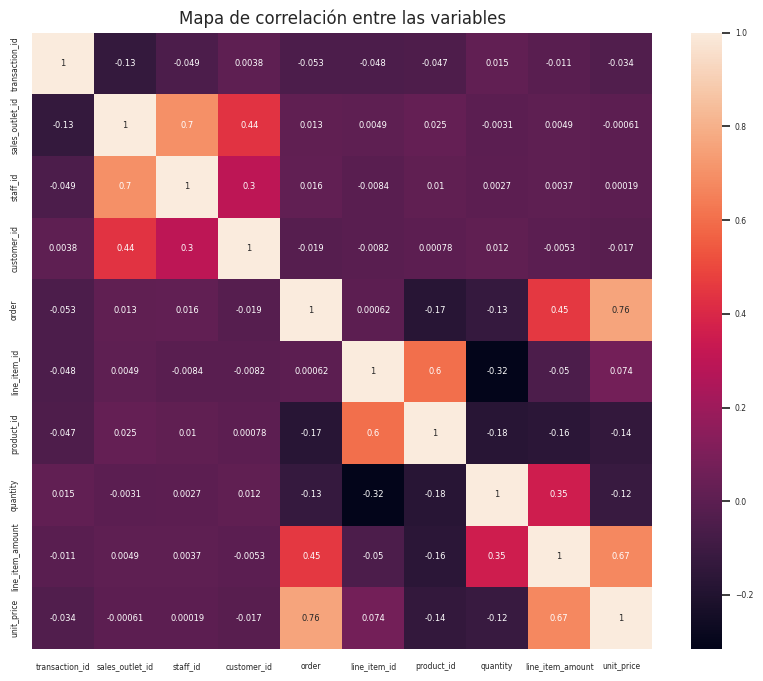

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.set(font_scale=0.5)
sns.heatmap(df.corr(), annot=True)
plt.title("Mapa de correlación entre las variables", fontsize=12)
plt.show()

<p align = "justify">
El heatmap nos muestra, ademas del índice de correlación entre cada variable, una escala de colores que representa la magnitud de la misma. Las magnitudes más altas (a partir de 0.7), del indice son:
</p>

- Staff_id y Sales_outlet_id: ic = 0,7
- Unit_price y Order: ic = 0,76
- Unit_price y Line_item_amount: ic = 0,67
- product_id y Line_item_id: ic = 0,60

<p align = "justify">
Destacamos la correlación entre "product_id" y "line_item_id", por ser la primera nuestra variable objetivo en el proyecto.
</p>

<p align = "justify">
Finalmente vamos a analizar las distribuciones de los datos en función de su frecuencia de aparición. Esto por medio de histogramas:
</p>

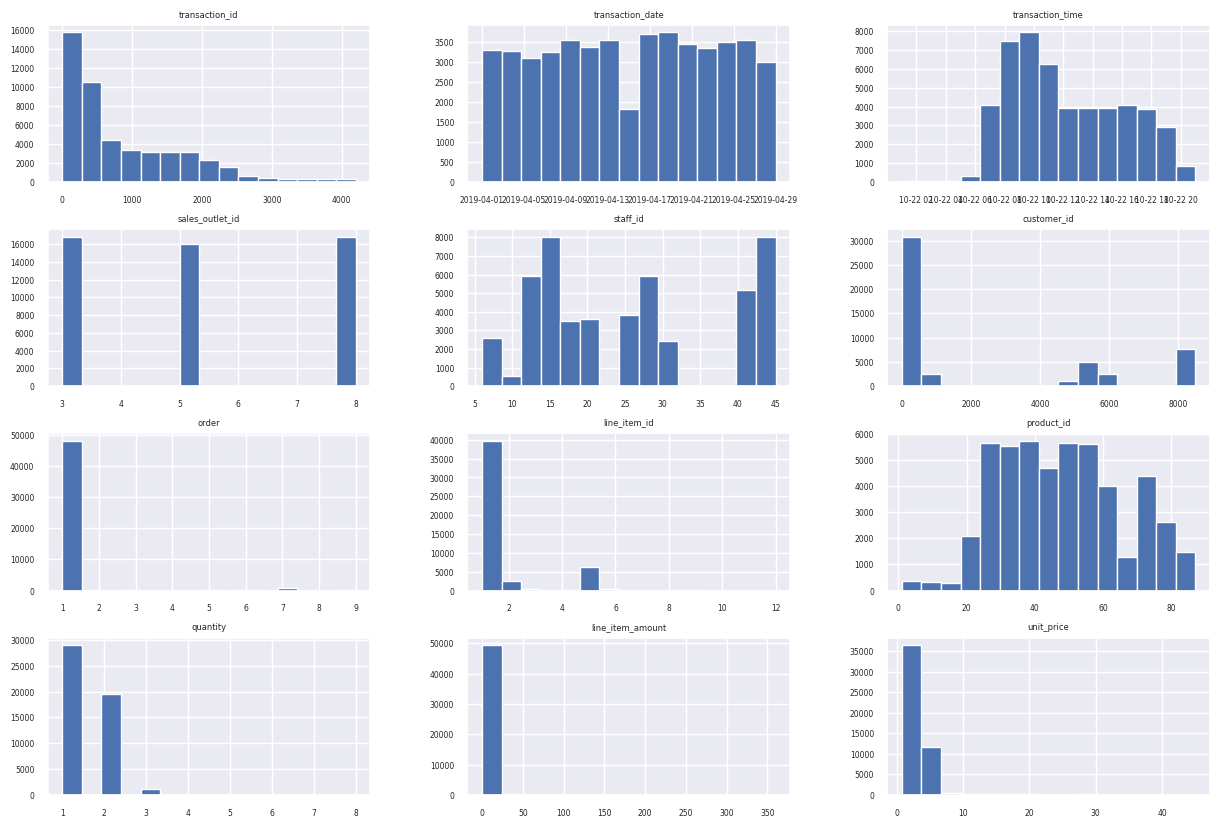

In [166]:
df.hist(bins=15, figsize=(15, 10));

<p align = "justify">
Lo anterior muestra que, si bien necesesitaríamos una observación en detalle y más profunda de cada variable en particular, se puede inferir que existen:
</p>
<ol>

<li>Variables con distribución normal y sesgadas hacia la izquierda:        
<ul>
<li>transaction_time           </li>
</li>
</ul>

<li>Variables con distribución uniforme:
<ul>          
<li>transaction_date                 </li>
</ul>
</li>

<li>Variables con distribución similar a geométrica:
<ul>          
<li>transaction_id             </li>
</ul>
</li>
</ol>

Las otras variables no presentan distribuciones definidas observables.

## **3** <u>**Interrogantes principales del Dataset**</u>
<p align = "justify">
Anteriormente, a modo de ejemplo, planteamos tres interrogantes principales con respecto a los datos observados en el dataset. A continuacion nuestra tarea va a ser intentar resolverlas de la manera más clara y sencilla posible. A modo de recordatorio las preguntas serán:
</p>

- Cuáles son lo productos más consumidos?
- Existe un patron de estacionalidad en las ventas?
- En que horarios se reporta la mayor cantidad de transacciones?

### **a) ¿Cuáles son lo productos más consumidos?**
<p align = "justify">
Podemos contestar esta interrogante por medio de un conteo de repetición de la clase de producto (columna ['product_id']). En primer lugar vamos a ver nuestra canasta total de productos y luego vamos a graficar.
</p>

In [167]:
df['product_id'].nunique()                               # Cantidad total de productos de la muestra.

80

In [168]:
frecuencias = df['product_id'].value_counts()                          # Demanda desagregada de productos en la muestra.
frecuencias

71    1031
50    1011
59     996
61     990
38     989
      ... 
14      48
4       47
12      45
18      41
19      35
Name: product_id, Length: 80, dtype: int64

En el siguiente gráfico de barras observamos la lista expresada anteriormente. Vemos que no hay una gran diferencia apreciable entre los primeros 10. A modo de curiosidad vamos a incluir un gráfico de barras con todos los productos:

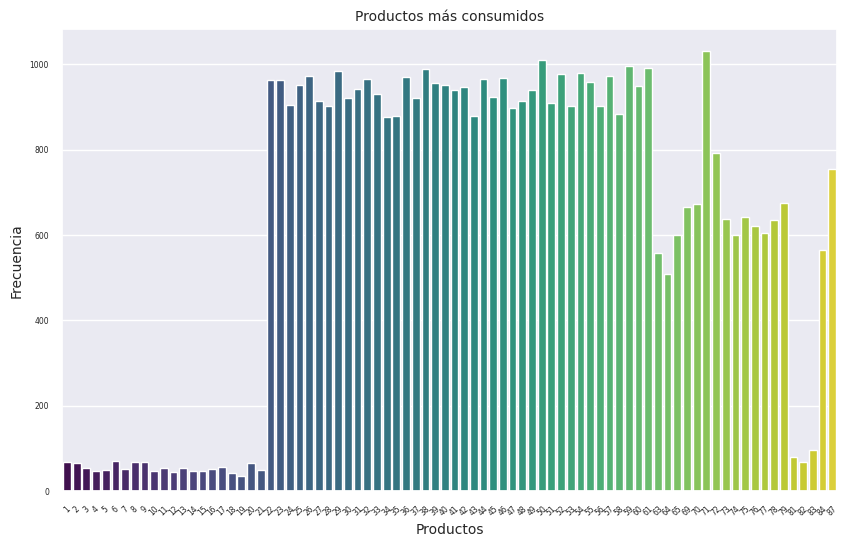

In [169]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='product_id', palette='viridis')
plt.xlabel('Productos', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Productos más consumidos', fontsize=10)
plt.xticks(rotation=45)
plt.show()

<p align = "justify">
En este último gráfico observamos que hay 3 grupos de productos: uno con mucha demanda, un media y uno baja. Entonces a los fines de responder la interrogante vamos a clasificar estos tres grupos. Primero calculamos los cuartiles que dividirán los datos en tres grupos:
</p>

In [170]:
q1 = frecuencias.quantile(1/3)
q2 = frecuencias.quantile(2/3)

Segundo dividimos los productos en tres grupos según su frecuencia

In [171]:
baja = frecuencias[frecuencias <= q1]
baja

84    565
63    558
64    509
83     97
81     79
6      70
1      69
82     69
9      67
8      67
2      65
20     65
17     57
13     55
11     54
3      53
16     52
7      51
5      50
21     50
15     48
10     48
14     48
4      47
12     45
18     41
19     35
Name: product_id, dtype: int64

In [172]:
baja.nunique()

21

In [173]:
media = frecuencias[(frecuencias > q1) & (frecuencias <= q2)]
media

37    922
30    922
27    914
48    913
51    908
24    904
28    903
56    902
53    902
47    898
58    883
35    879
43    878
34    876
72    791
87    755
79    674
70    672
69    666
75    642
73    638
78    634
76    620
77    604
74    600
65    599
Name: product_id, dtype: int64

In [174]:
media.nunique()

24

In [175]:
alta = frecuencias[frecuencias > q2]
alta

71    1031
50    1011
59     996
61     990
38     989
29     984
54     980
52     978
57     972
26     972
36     969
46     968
32     966
44     966
22     963
23     962
55     959
39     956
25     952
40     951
60     948
42     947
31     943
49     940
41     940
33     930
45     924
Name: product_id, dtype: int64

In [176]:
alta.nunique()

24

Y finalmente preparamos para graficar:

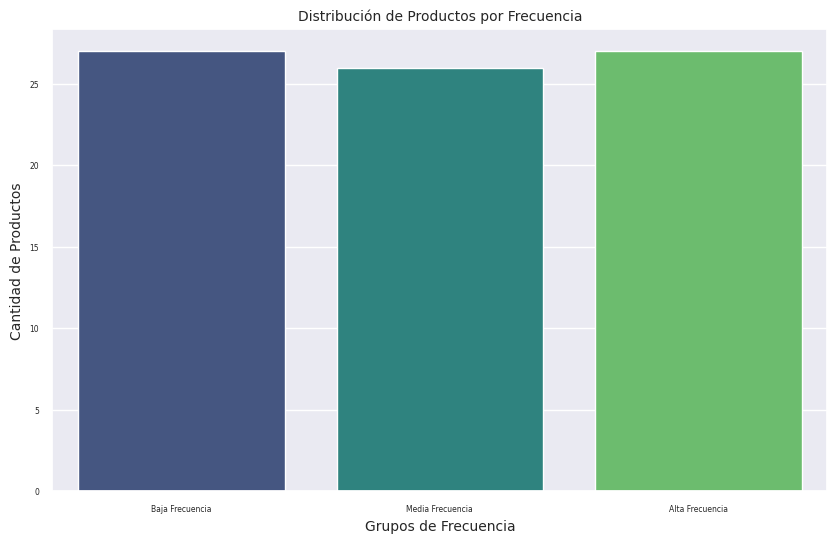

In [177]:
# Etiquetamos los grupos
etiquetas = ['Baja Frecuencia', 'Media Frecuencia', 'Alta Frecuencia']

# Contamos cuántos productos están en cada grupo
grupos = [len(baja), len(media), len(alta)]

# Creamos un gráfico de barras para mostrar la distribución de los productos en los grupos
plt.figure(figsize=(10, 6))
sns.barplot(x=etiquetas, y=grupos, palette='viridis')
plt.xlabel('Grupos de Frecuencia', fontsize=10)
plt.ylabel('Cantidad de Productos', fontsize=10)
plt.title('Distribución de Productos por Frecuencia', fontsize=10)
plt.show()

<p align = "justify">
Como conclusión se observa que hay un equilibrio entre los tres grupos. Pero a los fines de los negocios nos conviene tener identificados los tres para trabajar independientemente desde marketing entre ellos.
</p>

### **b) ¿Existe un patron de estacionalidad en las ventas?**
<p align = "justify">
Para responder esta pregunta vamos a intentar primero graficar para entender nuestra distribucion de las transacciones en el tiempo. Recordemos que las fechas son solo un intervalo de 29 días del mes de abril de 2019. Entonces:
</p>


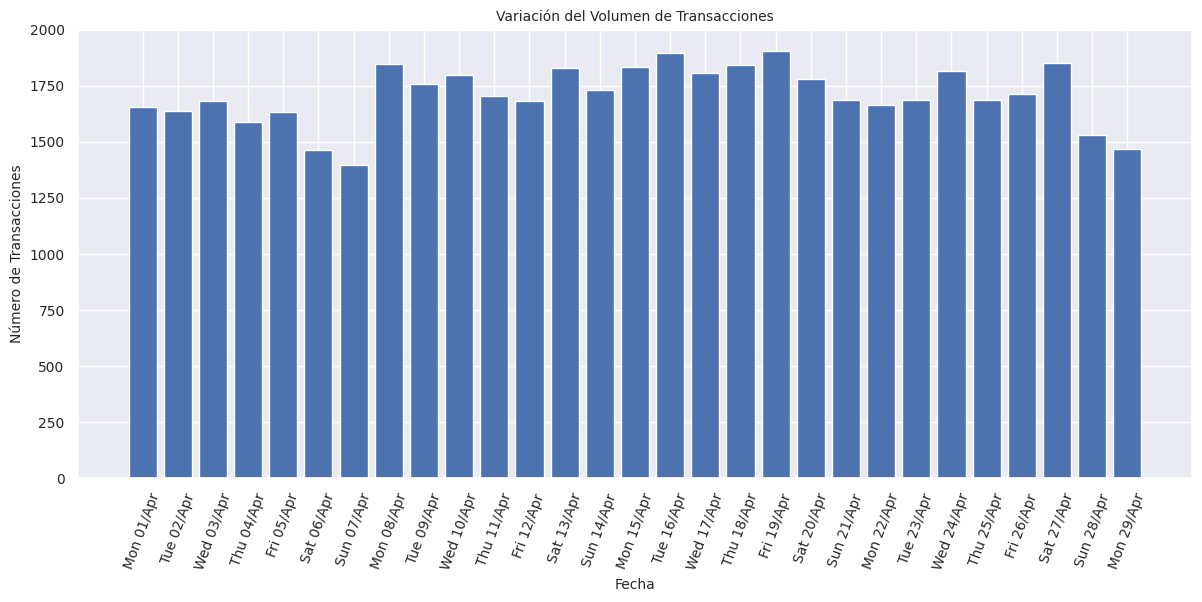

In [178]:
#Importamos esta librería para poder formatear la fecha en el gráfico
import matplotlib.dates as mdates

transacciones = df.groupby('transaction_date')['transaction_id'].count()

# Configuramos el gráfico del volumen de transacciones con un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(transacciones.index, transacciones, color='b')
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Número de Transacciones', fontsize=10)
plt.title('Variación del Volumen de Transacciones', fontsize=10)

# Obtenemos el nombre corto del día de la semana, el número del día y el nombre corto del mes
nombres_dias1 = transacciones.index.strftime('%a')
numeros_dias1 = transacciones.index.strftime('%d')
nombres_meses1 = transacciones.index.strftime('%b')

# Combinamos los resultados en el formato deseado
etiquetas = [f'{dia} {num}/{mes}' for dia, num, mes in zip(nombres_dias1, numeros_dias1, nombres_meses1)]

# Aplicamos las etiquetas personalizadas al eje X
plt.xticks(transacciones.index, etiquetas, rotation=70, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

<p align = "justify">
Desde el punto de vista de la variación del número o cantidad de transacciones en el intervalo de tiempo de la muestra, no se observa ningún fenómeno de estacionalidad fuerte entre los días de la semana. Veamos ahora desde las ventas:
</p>

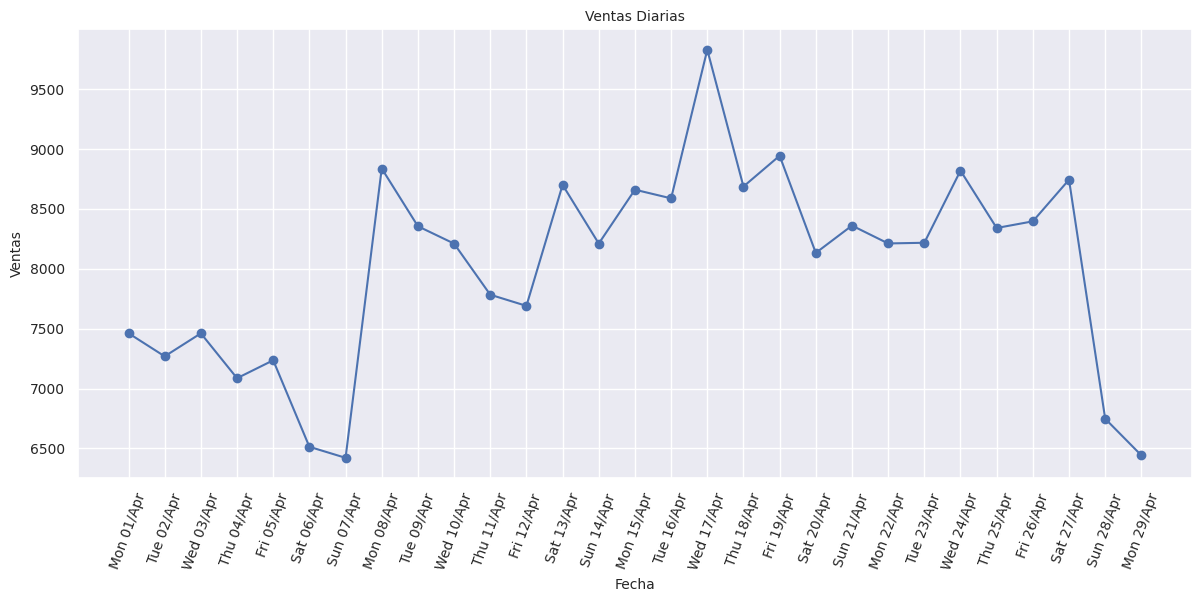

In [179]:
ventas = df.groupby('transaction_date')['line_item_amount'].sum()

# Configuramos el gráfico las ventas diarias con etiquetas de día
plt.figure(figsize=(12, 6))
plt.plot(ventas.index, ventas, marker='o', linestyle='-', color='b')
plt.xlabel('Fecha', fontsize=10)
plt.ylabel('Ventas', fontsize=10)
plt.title('Ventas Diarias', fontsize=10)

# Obtenemos el nombre corto del día de la semana, el número del día y el nombre corto del mes
nombres_dias2 = ventas.index.strftime('%a')
numeros_dias2 = ventas.index.strftime('%d')
nombres_meses2 = ventas.index.strftime('%b')

# Combinamos los resultados en el formato deseado
etiquetas = [f'{dia} {num}/{mes}' for dia, num, mes in zip(nombres_dias2, numeros_dias2, nombres_meses2)]

# Aplicamos las etiquetas personalizadas al eje X
plt.xticks(ventas.index, etiquetas, rotation=70, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

<p align = "justify">
En este caso también no se observa ningún fenómeno de estacionalidad fuerte entre los días de la semana. De esta forma podemos concluir que para las ventas, tanto medias como transacciones o como monto total, no se observa un fenómeno fuerte de estacionalidad.
</p>

### **c) ¿En que horarios se reporta la mayor cantidad de transacciones?**
<p align = "justify">
En este caso, primero vamos a verlo por código y luego graficaremos. Para esto primero obtendremos el conteo de transacciones agrupadas por hora del día
</p>

In [180]:
# Transacciones agrupadas por hora del día
transacciones_hora = df['transaction_time'].dt.hour.value_counts().sort_index()
transacciones_hora

1       22
2       30
3       25
4       18
5       17
6     1492
7     4468
8     5886
9     5906
10    6068
11    3270
12    2900
13    2905
14    2979
15    2981
16    3046
17    2909
18    2494
19    2017
20     167
Name: transaction_time, dtype: int64

Ahora, conociendo las cantidades vamos a proceder a graficar:

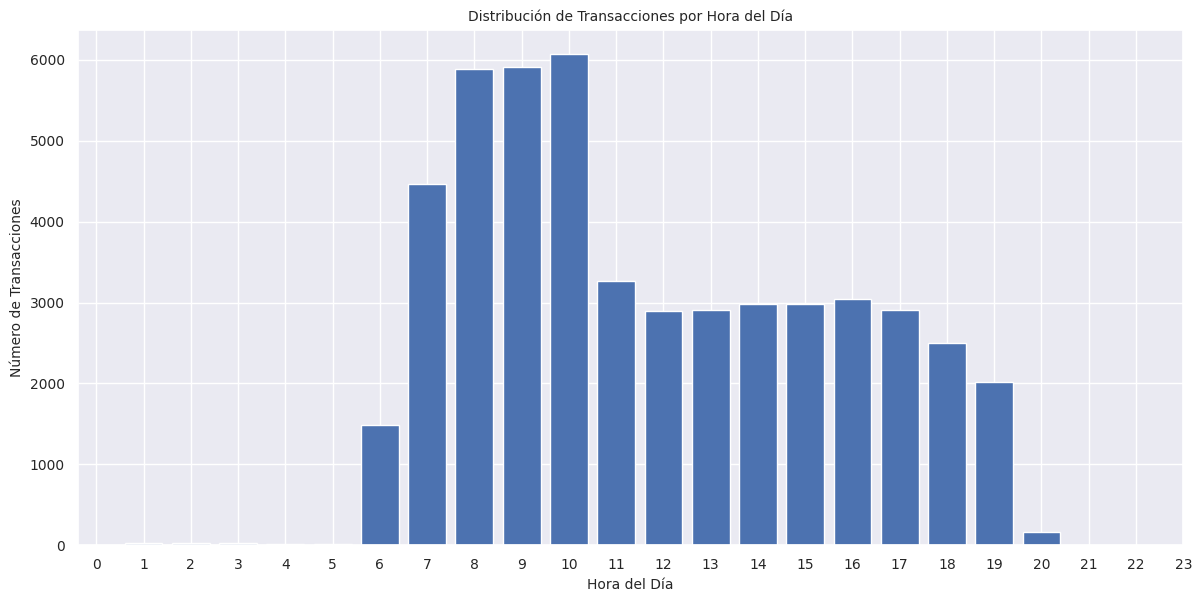

In [181]:
horarios = df.groupby(df['transaction_time'].dt.hour)['transaction_id'].count()

# Configuramos un gráfico de barras y graficamos
plt.figure(figsize=(12, 6))
plt.bar(horarios.index, horarios, color='b')
plt.xlabel('Hora del Día', fontsize=10)
plt.ylabel('Número de Transacciones', fontsize=10)
plt.title('Distribución de Transacciones por Hora del Día', fontsize=10)

plt.xticks(range(24), fontsize=10)  # Establecer las etiquetas del eje X como las horas del día (0 a 23)
plt.yticks(fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

<p align = "justify">
Finalmente, para poder interpretar mejor los resultados, vamos separar en grupos el grafico anterior utilizando colores segun el volumen de transacciones al por hora. De esta forma podríamos identificar un rango de horarios de demanda alta (7 a 10 hs), uno de media (de 11 a 19 hs), y baja el resto.
</p>

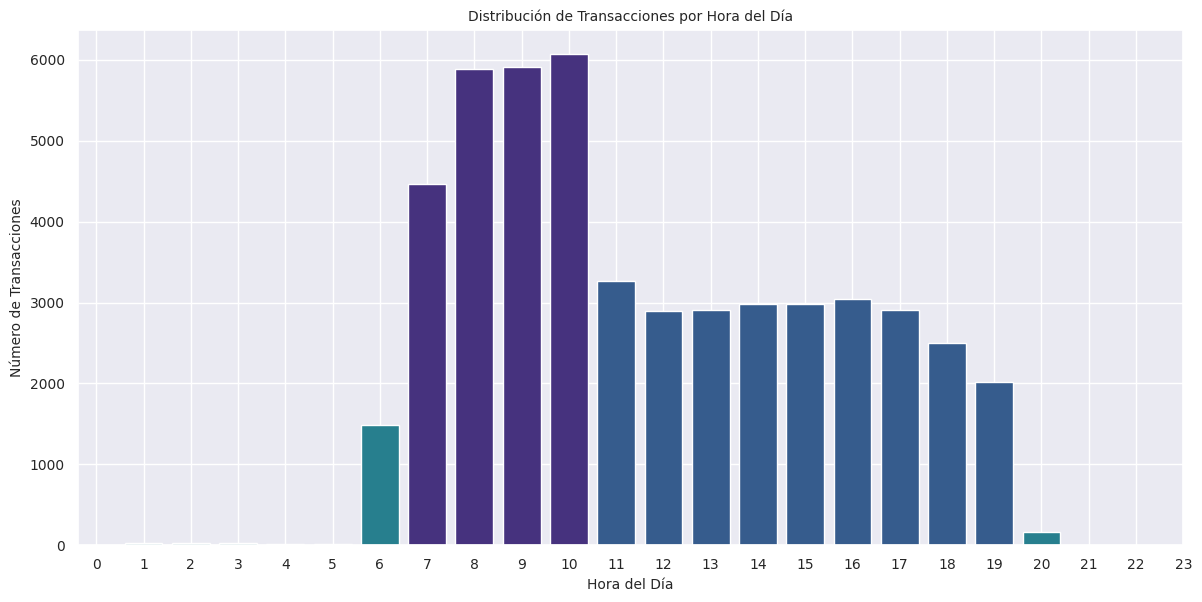

In [182]:
# Construimos una función para asignar cada hora a un grupo según la descripción
def asignar_grupo(hora):
    if hora in [7, 8, 9, 10]:
        return 'alta'
    elif 11 <= hora <= 19:
        return 'media'
    else:
        return 'baja'

# Agregamos una columna para el grupo en función de la hora del día
transacciones_hora_df = pd.DataFrame({'Hora del Día': transacciones_hora.index, 'Transacciones': transacciones_hora.values})
transacciones_hora_df['Grupo'] = transacciones_hora_df['Hora del Día'].apply(asignar_grupo)

# Para mantener la estética del informe seguimos utilizando la paleta "viridis"
viridis_palette = sns.color_palette("viridis")

# Graficamos el conteo de transacciones por hora con colores para cada grupo
plt.figure(figsize=(12, 6))
plt.bar(transacciones_hora_df['Hora del Día'], transacciones_hora_df['Transacciones'], color=transacciones_hora_df['Hora del Día'].apply(asignar_grupo).map({ 'alta': viridis_palette[0], 'media': viridis_palette[1], 'baja': viridis_palette[2] }))
plt.xlabel('Hora del Día', fontsize=10)
plt.ylabel('Número de Transacciones', fontsize=10)
plt.title('Distribución de Transacciones por Hora del Día', fontsize=10)

plt.xticks(range(24), fontsize=10)  # Establecemos las etiquetas del eje X como las horas del día (0 a 23)
plt.yticks(fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

<p align = "justify">
Se puede concluir en que efectivamente existen horarios importantes desde el punto de vista de las transacciones de estas cafeterías, que son las descriptas para construir la función que utilizamos para graficar. Cabe destacar que se podría haber hecho como en el caso de la primer pregunta, dividir la información por cuartiles para formar los grupos, pero se optó por esta forma porque mostraba una diferenciacion un poco difusa entre el rango medio y el alto.
</p>

### **3.1** <u>**Insight: Relación entre variables "unit_price" y "product_id"**</u>
<p align = "justify">
Adicionalmente hay que destacar que si bien el coeficiente de correlación de pearson entre las variables "unit_price" y "product_id" (nuestra variable objetivo), es bajo y negativo ("ic= -0,14"), no quiere decir que no guarden relación alguna. Desde el conocimiento del negocio se puede inferir que una caracteristica particular de un bien determinado es su precio por unidad, por lo que podría servir en términos generales para identificarlo.

Por las razones anteriores, si bien no exploraremos en profundidad la naturaleza de esta relación, vamos a graficar la relación entre las dos variables.

</p>

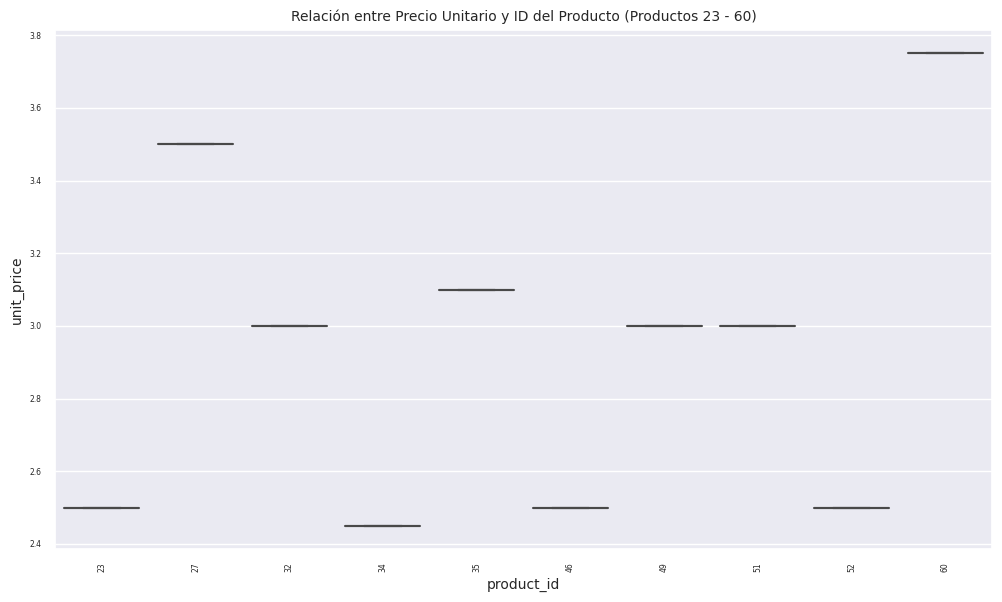

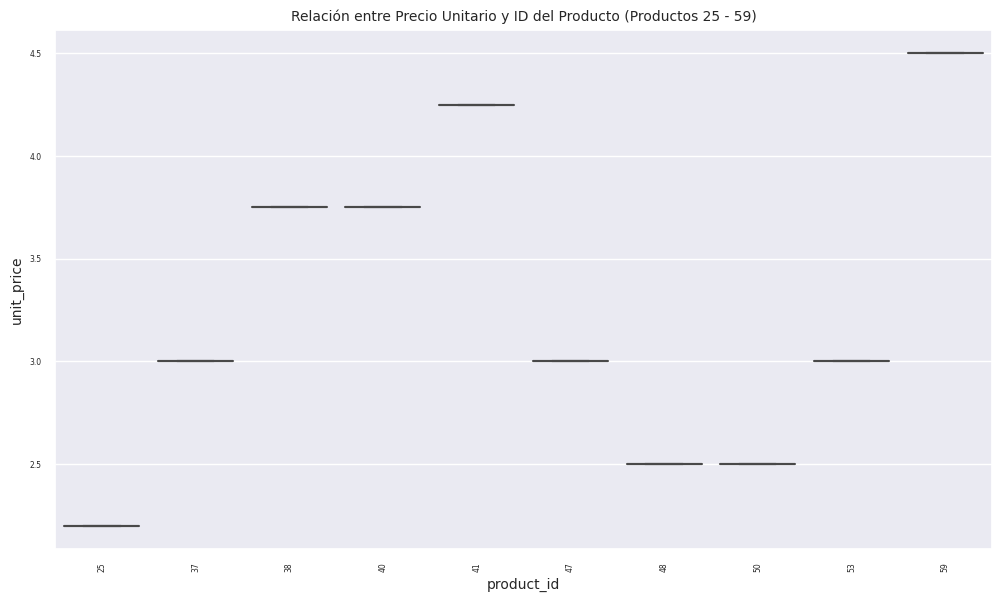

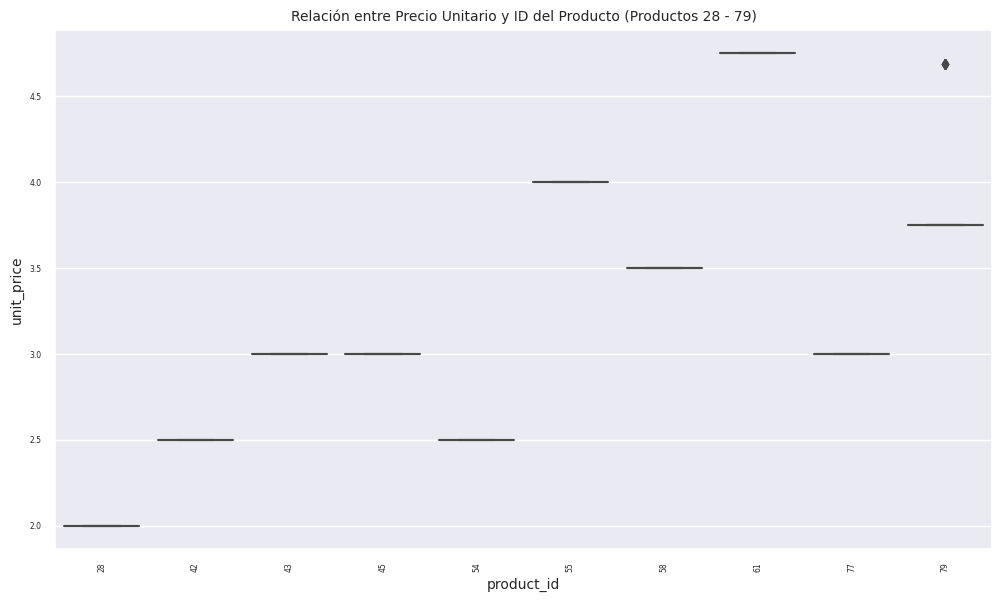

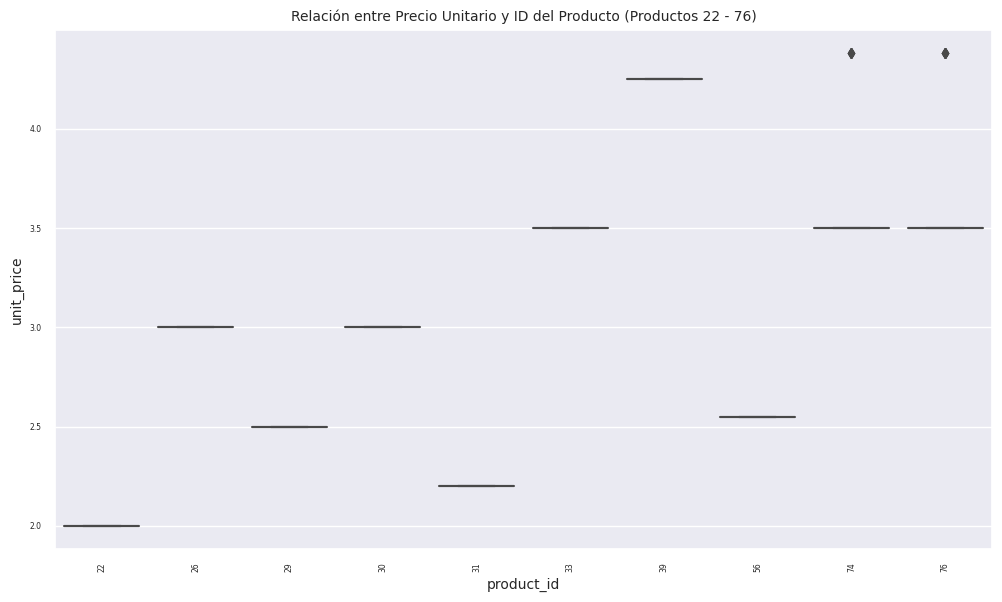

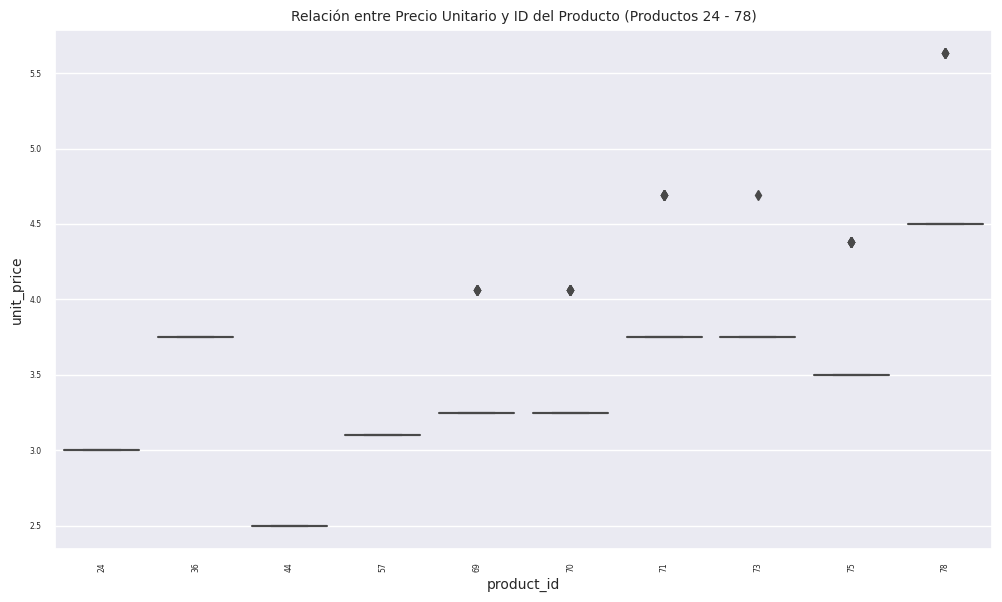

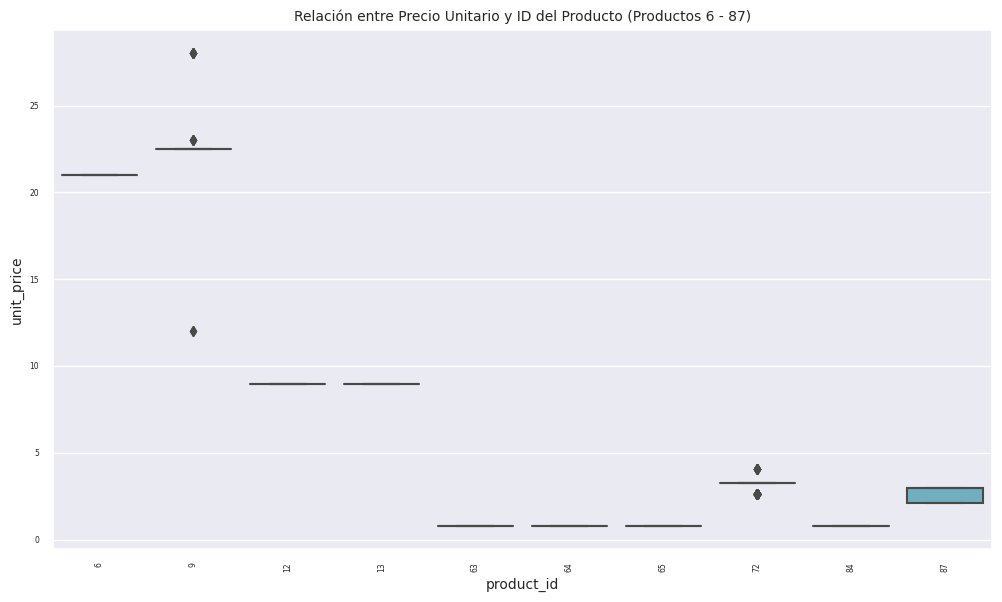

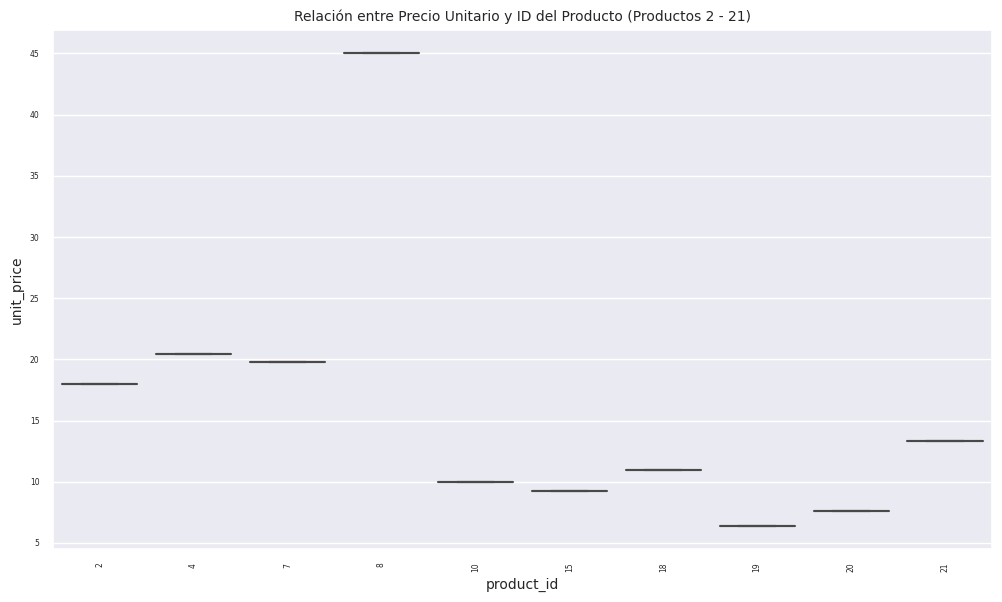

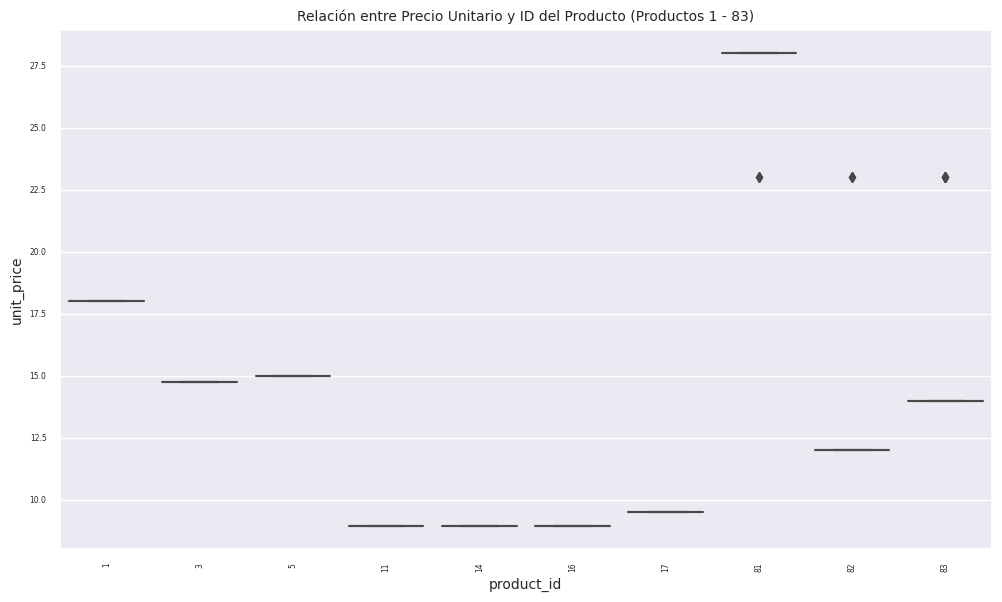

In [183]:
# Primero importamos la librería Numpy, necesaria para crear grupos de productos
import numpy as np

# Dividimos los IDs de productos en grupos de 10
product_ids = df['product_id'].unique()
num_groups = len(product_ids) // 10 + (1 if len(product_ids) % 10 != 0 else 0)
product_id_groups = np.array_split(product_ids, num_groups)

# Creamos gráficos de caja todos los grupo anteriores
for i, group in enumerate(product_id_groups):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='product_id', y='unit_price', data=df[df['product_id'].isin(group)])
    plt.xlabel('product_id', fontsize=10)
    plt.ylabel('unit_price', fontsize=10)
    plt.title(f'Relación entre Precio Unitario y ID del Producto (Productos {group.min()} - {group.max()})', fontsize=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

<p align = "justify">
De los gráficos anteriores se puede observar como los los mismos se "achatan" para hacer coincidir los valores de los quartiles en valores únicos. Es por esta razón que se decidió utilizar boxplots, para poder demostrar que para cada producto en particular hay un solo precio.

Si bien se observan algunos outliers, y un cierto grado de variabilidad para el precio del producto cuya id es "87", podemos concluir que la variable es un muy buen atributo para determinar el tipo de producto que se intenta identificar mediante técnicas de clasificación.
</p>

## **4** <u>**Cálculo de la variable objetivo mediante algoritmo de clasificación**</u>
<p align = "justify">
En esta sección deseamos entrenar un modelo de machine learning para poder predecir el tipo de producto que corresponde a las diversas transacciones que tenemos como instancias de nuestro dataset.

Para esto, en primer lugar, utilizar un método de codificación para transformar las variables categóricas en numéricas. Luego crearemos un solo dataset con las variables anteriores más las variables cuantitativas, para después someterlo una transformación de escalado para adecuar a todas las variables para el proceso de entrenamiento del modelo.

Finalmente, una vez obtenidos los valores listos para el entrenamiento y prueba de nuestro modelo, utilizaremos un modelo de feature selection para reducir la dimensionalidad, seleccionaremos y entrenaremos un algoritmo de clasificación, y finalmente calcularemos las métricas correspondientes para evaluar su desempeño.
</p>

### **4.1** <u>**Data encoding**</u>
<p align = "justify">
Por medio del data encoding podemos transformar nuestras variables categóricas a variables numéricas para que puadan ser fácilmente utilizadas a la hora de implementarlas en el modelo.<br><br>
Particularmente nosotros contamos con 9 variables cualitativas "nominales" en el dataset, de las cuales 7 ya están en formato numérico, dos tienen el formato no numérico "object". Estas son "instore_yn" y "promo_item_yn" que cuentan con dos posibles valores: "Y" y "N". Entonces trataremos de transformar el valor "Y" en el valor numérico "1", y el "N", en el valor numérico "0".
</p>

In [184]:
# En primer vamos a cambiar el nombre del dataset
dff = df

In [185]:
# Definimos el diccionario de reemplazo
reemp = {'Y': 1, 'N': 0}

# Aplicamos el reemplazo en 'instore_yn' y 'promo_item_yn'
dff['instore_yn'] = dff['instore_yn'].replace(reemp)
dff['promo_item_yn'] = dff['promo_item_yn'].replace(reemp)

# Quitamos los warnings y verificamos el dataset después del reemplazo
import warnings
warnings.filterwarnings('ignore')

dff.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
sales_outlet_id              int64
staff_id                     int64
customer_id                  int64
instore_yn                   int64
order                        int64
line_item_id                 int64
product_id                   int64
quantity                     int64
line_item_amount           float64
unit_price                 float64
promo_item_yn                int64
dtype: object

### **4.2** <u>**Preparación de variables numéricas**</u>
<p align = "justify">
Para seguir con la adecuación de nuestro modelo de analisis el próximo paso es la preparación de variables numéricas. En este punto vamos a trabajar con dichas variables, para luego someterlas al proceso de transformaciones de escalado.
<br><br>
Hasta aquí las únicas dos variables que no son del tipo numérico son "transaction_date" y "transaction_time", que son del tipo "datetime64". Lo que haremos a continuación es extraer las características útiles como el año, mes, día, hora, minuto, segundo. Estas características extraídas si se pueden usar como variables numéricas en el modelos de machine learning.
</p>

In [186]:
# Primero extraemos características de la fecha
dff['year'] = dff['transaction_date'].dt.year
dff['month'] = dff['transaction_date'].dt.month
dff['day'] = dff['transaction_date'].dt.day

# Luego las características del tiempo
dff['hour'] = dff['transaction_time'].dt.hour
dff['minute'] = dff['transaction_time'].dt.minute
dff['second'] = dff['transaction_time'].dt.second

# Finalmente eliminamos 'transaction_date' y 'transaction_time' del dataset
dff.drop(['transaction_date', 'transaction_time'], axis=1, inplace=True)
dff.dtypes

transaction_id        int64
sales_outlet_id       int64
staff_id              int64
customer_id           int64
instore_yn            int64
order                 int64
line_item_id          int64
product_id            int64
quantity              int64
line_item_amount    float64
unit_price          float64
promo_item_yn         int64
year                  int64
month                 int64
day                   int64
hour                  int64
minute                int64
second                int64
dtype: object

<p align = "justify">
El dataset resultante, compuesto únicamente por variables en formato numérico ya está parcialmente listo para las técnicas de transformación de escalado y reducción de dimensionalidad.
</p>

### **4.3** <u>**Transformaciones de escalado**</u>
<p align = "justify">
Nuestro dataset anterior, no puede ser utilizado directamente para el modelo. Esto es por dos razones: primero porque hay que extraer la variable objetivo, para así formar los conjuntos los pares de valores "x/y", y segundo porque las variables del conjunto de datos tienen diferentes escalas o rangos, y que pueden afectar la interpretación de los resultados y el desempeño de nuestro algoritmo.<br><br>
Las transformaciones escalares son técnicas utilizadas para cambiar la escala o rango de los valores de una variable. Al aplicarlas, se busca que las variables tengan una distribución más equilibrada y estén en una escala común, lo que es beneficioso para el modelo.<br><br>
Dicho lo anterior entonces:
</p>

In [187]:
# Separación de la variable objetivo
y = dff['product_id']
y

0        52
1        27
2        46
3        23
4        34
         ..
49889    30
49890    25
49891    31
49892    44
49893    75
Name: product_id, Length: 49600, dtype: int64

In [188]:
# Preparación de la variables restantes para el escalado
x = dff.drop(['product_id'], axis=1)
x

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,quantity,line_item_amount,unit_price,promo_item_yn,year,month,day,hour,minute,second
0,7,3,12,558,0,1,1,1,2.50,2.50,0,2019,4,1,12,4,43
1,11,3,17,781,0,1,1,2,7.00,3.50,0,2019,4,1,15,54,39
2,19,3,17,788,1,1,1,2,5.00,2.50,0,2019,4,1,14,34,59
3,32,3,12,683,0,1,1,2,5.00,2.50,0,2019,4,1,16,6,4
4,33,3,17,99,1,1,1,1,2.45,2.45,0,2019,4,1,19,18,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49889,753,8,42,0,0,1,1,1,3.00,3.00,0,2019,4,29,16,51,58
49890,756,8,42,8412,1,1,1,2,4.40,2.20,0,2019,4,29,16,51,14
49891,759,8,15,0,1,1,1,1,2.20,2.20,0,2019,4,29,11,17,36
49892,763,8,45,8030,0,1,1,2,5.00,2.50,0,2019,4,29,15,45,52


El escalado lo vamos a hacer instanciando el módulo "preprocessing" de "sklearn", utilizando "MinMaxScaler"

In [189]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

nombreVar = x.columns.tolist()                # Antes que nada vamos a recordar el nombre de nuestras variables en una lista

xEsc = scaler.fit_transform(x)                # Nuevamente obtenemos un array
x = pd.DataFrame(xEsc, columns = nombreVar)   # Volvemos a nombrar las variables obtenidas con sus nombres originales
x = pd.DataFrame(x)                           # Transformamos el array a un dataframe
x

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,quantity,line_item_amount,unit_price,promo_item_yn,year,month,day,hour,minute,second
0,0.001428,0.0,0.153846,0.065639,0.0,0.0,0.000000,0.000000,0.006944,0.038462,0.0,0.0,0.0,0.0,0.578947,0.067797,0.728814
1,0.002380,0.0,0.282051,0.091872,0.0,0.0,0.000000,0.142857,0.019444,0.061086,0.0,0.0,0.0,0.0,0.736842,0.915254,0.661017
2,0.004284,0.0,0.282051,0.092695,1.0,0.0,0.000000,0.142857,0.013889,0.038462,0.0,0.0,0.0,0.0,0.684211,0.576271,1.000000
3,0.007377,0.0,0.153846,0.080343,0.0,0.0,0.000000,0.142857,0.013889,0.038462,0.0,0.0,0.0,0.0,0.789474,0.101695,0.067797
4,0.007615,0.0,0.282051,0.011646,1.0,0.0,0.000000,0.000000,0.006806,0.037330,0.0,0.0,0.0,0.0,0.947368,0.305085,0.627119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49595,0.178962,1.0,0.923077,0.000000,0.0,0.0,0.000000,0.000000,0.008333,0.049774,0.0,0.0,0.0,1.0,0.789474,0.864407,0.983051
49596,0.179676,1.0,0.923077,0.989531,1.0,0.0,0.000000,0.142857,0.012222,0.031674,0.0,0.0,0.0,1.0,0.789474,0.864407,0.237288
49597,0.180390,1.0,0.230769,0.000000,1.0,0.0,0.000000,0.000000,0.006111,0.031674,0.0,0.0,0.0,1.0,0.526316,0.288136,0.610169
49598,0.181342,1.0,1.000000,0.944595,0.0,0.0,0.000000,0.142857,0.013889,0.038462,0.0,0.0,0.0,1.0,0.736842,0.762712,0.881356


El nuevo dataset está listo para la reducción de la dimensionalidad.

### **4.4** <u>**Reducción de la dimensionalidad**</u>
<p align = "justify">
En términos generales la reducción de dimensionalidad se encarga de identificar y eliminar las características que disminuyen el rendimiento de nuestro modelo de aprendizaje automático, es por esto que vamos a incorporarla para obtener mejores resultados a la hora de predecir nuestra variable objetivo.<br><br>
A continuación importaremos las librerías necesarias, crearemos el selector de variables y obtenderemos los nombres de las variables más relevantes para nuestro modelo.
</p>

In [190]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector

# Creamos un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Creamos el selector de características secuenciales
sfs = SequentialFeatureSelector(rf_classifier, k_features=5, forward=True, verbose=2, scoring='accuracy', cv=3, n_jobs=-1)

# Realizamos la selección de características en el conjunto de datos "x" e "y"
sfs.fit(x, y)

# Obtenemos las características seleccionadas con sus nombres originales
selected_feature_indices = sfs.k_feature_idx_
selected_feature_names = x.columns[list(selected_feature_indices)]

# Creamos un nuevo DataFrame con las características seleccionadas
x1 = x[selected_feature_names]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.9min finished

[2023-10-22 14:35:32] Features: 1/5 -- score: 0.3100405020857089[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.9min finished

[2023-10-22 14:38:28] Features: 2/5 -- score: 0.3384076253815184[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.5min finished

[2023-10-22 14:40:56] Features: 3/5 -- score: 0.35358908188439636[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  2.2min finished

[2023-10-22 14:43:06] Features: 4/5 -- score: 0.3597786679312028[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  4.4min finished

[20

Para nuestro selector de variables vamos a consideramos:
- el algoritmo "Random Forest" para el estimador, ya que buscamos un modelo de clasificación.
- El valor de 5 variables, dado que buscamos que se ejecute en un tiempo razonable.
- El método "Forward selection".
- verbose = 2
- El puntaje "accuracy".
- "3" divisiones de entrenamiento para la validación cruzada utilizando k-fold.
- Y aplicamos "n_jobs = -1" es decir, se utilizarán todos los núcleos disponibles.

Podemos observar que el puntaje total es bajo "precisión (aproximada del 37%). y las variables seleccionadas son "transaction_id", "customer_id", "line_item_id", "line_item_amount" y "unit_price". Vamos a intentar por medio de "GridSearchCV" optimizar los hiperparámetros para obtener un mejor resultado.

In [191]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Definimos el clasificador RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Definimos los hiperparámetros y sus valores a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creamos el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Ajustamos el modelo en los datos
random_search.fit(x, y)

# Imprimimos los mejores hiperparámetros y puntaje del mejor modelo
print("Mejores hiperparámetros:", random_search.best_params_)
print("Mejor puntaje:", random_search.best_score_)



Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Mejor puntaje: 0.31094728702054275


<p align = "justify">
Vemos como resultado:

Mejores Hiperparámetros:

- n_estimators: 200: Este es el número de árboles en el bosque. En este caso, se encontró que utilizar 200 árboles es la mejor opción.
- min_samples_split: 2: Este parámetro especifica el número mínimo de muestras requeridas para dividir un nodo interno. Se encontró que dividir un nodo con al menos 2 muestras es la mejor opción.
- min_samples_leaf: 2: Este parámetro especifica el número mínimo de muestras requeridas para que un nodo sea una hoja (nodo terminal). Se encontró que tener al menos 2 muestras en las hojas es la mejor opción.
- max_depth: None: Este parámetro controla la profundidad máxima de los árboles. En este caso, no se estableció ninguna profundidad máxima, lo que significa que los árboles pueden crecer hasta que contengan un número mínimo de muestras en las hojas (min_samples_leaf).

Mejor Puntaje: (0.302338496120280)
Este es el puntaje (en este caso, precisión) alcanzado por el modelo con la combinación de hiperparámetros mencionada anteriormente.<br><br>
En terminos generales el puntaje bajó desde el ejemplo anterior, entonces vamos a seguir adelante con los hiperparámetros anteriores.
</p>

### **4.5** <u>**Selección y entrenamiento del algoritmo de clasificación**</u>
<p align = "justify">
Los algoritmos de clasificación son métodos utilizados en el campo del aprendizaje automático y la inteligencia artificial para asignar objetos o ejemplos a categorías predefinidas o etiquetas. La tarea principal de los algoritmos de clasificación es aprender un modelo a partir de datos de entrenamiento que permita predecir la etiqueta o clase de nuevos datos no etiquetados.<br><br>
En otras palabras, los algoritmos de clasificación toman un conjunto de datos con características (atributos) y etiquetas (clases) conocidas, y utilizan este conjunto para entrenar un modelo que pueda realizar predicciones precisas sobre la clase de nuevos datos basados en sus características.<br><br>
Algunos ejemplos de algoritmos de clasificación incluyen:

<ol>         
<li>Regresión Logística                                 </li>
<li>Árboles de Decisión                                 </li>
<li>Random Forest                                       </li>
<li>Support Vector Machines (SVM)                       </li>
<li>K-Nearest Neighbors (KNN)                           </li>
<li>Naive Bayes                                         </li>
<li>Redes Neuronales Artificiales                       </li>
<li>Gradient Boosting (incluyendo XGBoost, LightGBM y CatBoost)                                               </li>
<li>Vecinos más Cercanos Basados en Prototipos (LVQ)                                                   </li>
<li>Clasificador Bayesiano Ingenuo (NBC)                 </li>
</ol>

En nuestro caso particular vamos a utilizar "Random Forest" dado que los clasificadores de bosques aleatorios son robustos y pueden manejar múltiples clases. Son una buena opción cuando hay una gran cantidad de clases y datos.
</p>

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Dividimos el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)

# Creamos un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo en los datos de entrenamiento
rf_classifier.fit(x_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred = rf_classifier.predict(x_test)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("El puntaje de precisión es:", accuracy)

El puntaje de precisión es: 0.38618951612903224


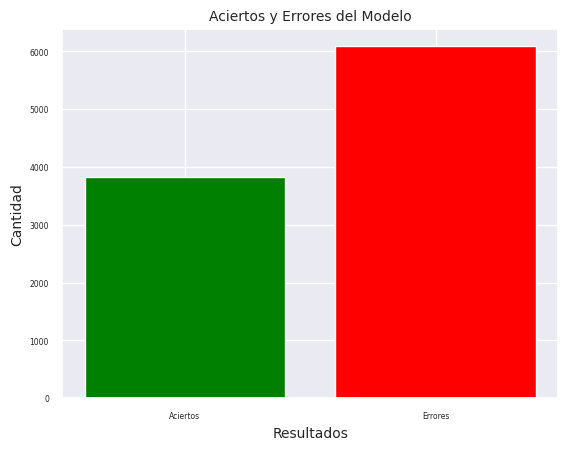

In [193]:
# Creamos una gráfica de barras para mostrar los resultados
labels = ['Aciertos', 'Errores']
counts = [accuracy * len(y_test), (1 - accuracy) * len(y_test)]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Resultados', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Aciertos y Errores del Modelo', fontsize=10)
plt.show()

<p align = "justify">
El resultado obtenido es un puntaje de precisión de aproximadamente 0.386, lo que significa que el modelo de clasificación Random Forest fue capaz de predecir correctamente alrededor del 38.6% de las instancias en el conjunto de prueba. Sin embargo, dado que hay aproximadamente 80 valores únicos para la variable objetivo "product_id", este resultado puede no ser satisfactorio<br><br>
Para mejorar el rendimiento del modelo,  en postriores etapas de mejora del modelo, se podría considerar explorar otras técnicas de reducción de dimensionalidad, ajustar hiperparámetros adicionales, probar otros algoritmos de clasificación.<br><br>
Por el momento, a modo de ejemplo, vamos a explorar los resultados del modelo con el conjunto de datos sin reducción de la dimensionalidad para evaluar su desempeño.
</p>

In [194]:
# Dividimos el conjunto de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creamos un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo en los datos de entrenamiento
rf_classifier.fit(x_train, y_train)

# Realizamos predicciones en los datos de prueba
y_pred = rf_classifier.predict(x_test)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("El puntaje de precisión es:", accuracy)

El puntaje de precisión es: 0.3875


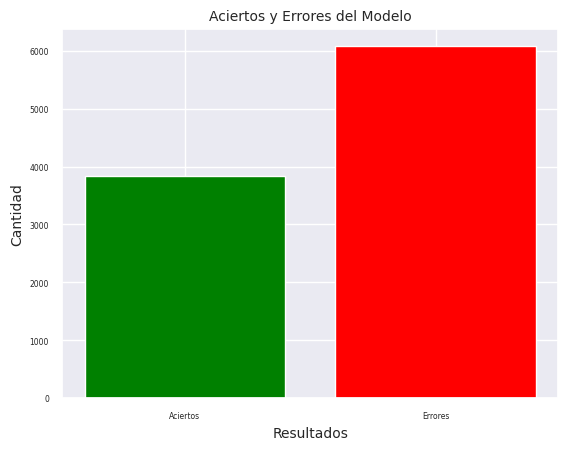

In [195]:
# Creamos la gráfica de barras para mostrar los resultados
labels = ['Aciertos', 'Errores']
counts = [accuracy * len(y_test), (1 - accuracy) * len(y_test)]

plt.bar(labels, counts, color=['green', 'red'])
plt.xlabel('Resultados', fontsize=10)
plt.ylabel('Cantidad', fontsize=10)
plt.title('Aciertos y Errores del Modelo', fontsize=10)
plt.show()

<p align = "justify">
Como podemos ver, la reducción de la dimensionalidad ha hecho una simplificación bastante eficiente al reducir el conjunto de datos independientes "x", de 17 a 5 variables. Esto solo supuso una pérdida de precisión del orden del "0,132%" lo que es despreciable si lo comparamos en términos de la reducción del tiempo de procesamiento y los recursos comutacionales invertidos.
</p>

## **5** <u>**Segunda ronda de feature engineering**</u>
<p align = "justify">
El objetivo de esta segunda ronda de feature engineering es el de aumentar la cantidad de variables del modelo para tratar de conseguir una mejor puntuación de desempeño en el modelo. Dado nuestro caso particular el dataset tiene unas 49600 instancias, por cuestiones de recursos computacionales, vamos a intentar reducir la cantidad de instancias del dataset para el mejor desempeño del algoritmo. La librería que pretendemos utilizar para tal fin es "imbalanced-learn".<br><br>
</p>

### **5.1** <u>**Aplicación de la librería "imbalanced-learn"**</u>
Haciendo uso de esta librería vamos a realizar dos pasos:

- Primero vamos a utilizar el algoritmo SMOTE (Generación sintética de muestras), que genera muestras sintéticas basadas en las muestras existentes de la clase minoritaria. Esto es con el fin de aumentar la cantidad de instancias de estas últimas, ya que tenemos valores de frecuencia de 50 en estas, comparadas con las clases mayoritarias que tienen alrededor de 1000. Esto ayudará a evitar el sobreajuste y a mantener la diversidad.<br><br>
- Segundo, utilizaremos la técnica de submuestreo estratégico. Con esta última vamos a reducir la cantidad de instancias del conjunto de datos.
</p>

In [196]:
!pip install imbalanced-learn         # Primero instalamos la librería

In [197]:
from imblearn.over_sampling import SMOTE

# Creamos una instancia de SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Puedes ajustar 'sampling_strategy' según tu necesidad

# Aplicamos SMOTE para generar muestras sintéticas utilizando el conjunto de datos primario
X_resampled, y_resampled = smote.fit_resample(x, y)
X_resampled

,transaction_id,sales_outlet_id,staff_id,customer_id,instore_yn,order,line_item_id,quantity,line_item_amount,unit_price,promo_item_yn,year,month,day,hour,minute,second
0,0.001428,0.0,0.153846,0.065639,0.0,0.0,0.000000,0.000000,0.006944,0.038462,0.0,0.0,0.0,0.000000,0.578947,0.067797,0.728814
1,0.002380,0.0,0.282051,0.091872,0.0,0.0,0.000000,0.142857,0.019444,0.061086,0.0,0.0,0.0,0.000000,0.736842,0.915254,0.661017
2,0.004284,0.0,0.282051,0.092695,1.0,0.0,0.000000,0.142857,0.013889,0.038462,0.0,0.0,0.0,0.000000,0.684211,0.576271,1.000000
3,0.007377,0.0,0.153846,0.080343,0.0,0.0,0.000000,0.142857,0.013889,0.038462,0.0,0.0,0.0,0.000000,0.789474,0.101695,0.067797
4,0.007615,0.0,0.282051,0.011646,1.0,0.0,0.000000,0.000000,0.006806,0.037330,0.0,0.0,0.0,0.000000,0.947368,0.305085,0.627119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82475,0.240789,1.0,0.977268,0.000000,1.0,0.0,0.080594,0.016209,0.006495,0.029412,1.0,0.0,0.0,0.730495,0.765586,0.984615,0.620990
82476,0.160253,0.4,0.153846,0.000000,1.0,0.0,0.000000,0.142857,0.016667,0.049774,0.0,0.0,0.0,0.806628,0.263158,0.444138,0.675065
82477,0.068877,1.0,0.925058,0.000000,1.0,0.0,0.000000,0.000000,0.008333,0.049774,0.0,0.0,0.0,0.460607,0.479106,0.514075,0.440678
82478,0.262044,0.4,0.563894,0.000000,1.0,0.0,0.000000,0.142857,0.016667,0.049774,0.0,0.0,0.0,0.536150,0.368849,0.611756,0.287722


<p align = "justify">
Podemos observar que pasamos aproximadamente al doble de instancias (82480 filas). Ahora, nuestro nuevo conjunto de datos y variable objetivo son respectivamente "X_resampled" e "y_resampled". A continuación, mediante una gráfica podríamos corroborar rápidamente si el balanceo de clases ha resultado efectivo:
</p>

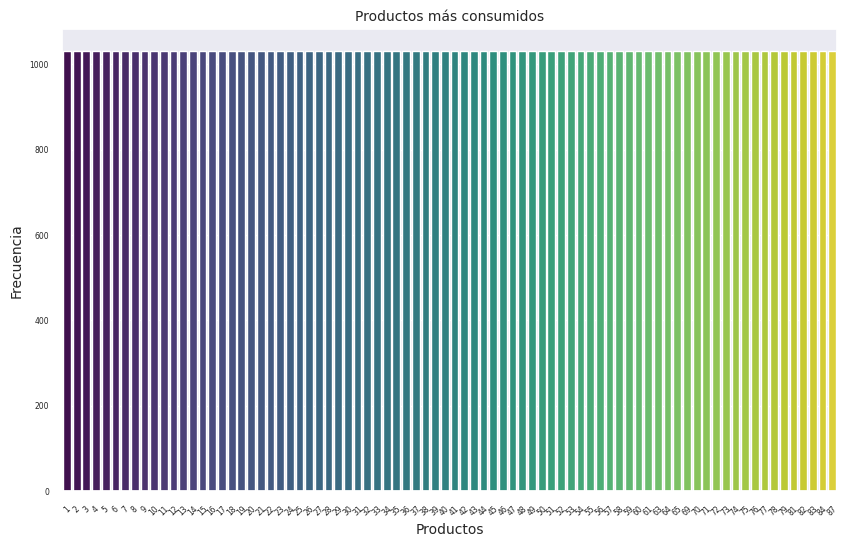

In [198]:
plt.figure(figsize=(10, 6))
sns.countplot(data=X_resampled, x=y_resampled, palette='viridis')
plt.xlabel('Productos', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Productos más consumidos', fontsize=10)
plt.xticks(rotation=45)
plt.show()

<p align = "justify">
Ahora estamos en condiciones de aplicar la técnica de submuestreo estratégico. Para esto, vamos a reducir la cantidad de instancias a 10.000.
</p>

In [199]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Definimos el número deseado de muestras para cada clase
desired_count = 115

# Calculamos cuántas muestras tienes actualmente en cada clase
class_counts = Counter(y_resampled)

# Aplicamos submuestreo
under_sampler = RandomUnderSampler(sampling_strategy={class_label: desired_count for class_label in class_counts})

X_resampled_under, y_resampled_under = under_sampler.fit_resample(X_resampled, y_resampled)

# Verificamos que ahora todas las clases tengan el número deseado de muestras
print('Conteo después de submuestreo:', Counter(y_resampled_under))


Conteo después de submuestreo: Counter({1: 115, 2: 115, 3: 115, 4: 115, 5: 115, 6: 115, 7: 115, 8: 115, 9: 115, 10: 115, 11: 115, 12: 115, 13: 115, 14: 115, 15: 115, 16: 115, 17: 115, 18: 115, 19: 115, 20: 115, 21: 115, 22: 115, 23: 115, 24: 115, 25: 115, 26: 115, 27: 115, 28: 115, 29: 115, 30: 115, 31: 115, 32: 115, 33: 115, 34: 115, 35: 115, 36: 115, 37: 115, 38: 115, 39: 115, 40: 115, 41: 115, 42: 115, 43: 115, 44: 115, 45: 115, 46: 115, 47: 115, 48: 115, 49: 115, 50: 115, 51: 115, 52: 115, 53: 115, 54: 115, 55: 115, 56: 115, 57: 115, 58: 115, 59: 115, 60: 115, 61: 115, 63: 115, 64: 115, 65: 115, 69: 115, 70: 115, 71: 115, 72: 115, 73: 115, 74: 115, 75: 115, 76: 115, 77: 115, 78: 115, 79: 115, 81: 115, 82: 115, 83: 115, 84: 115, 87: 115})


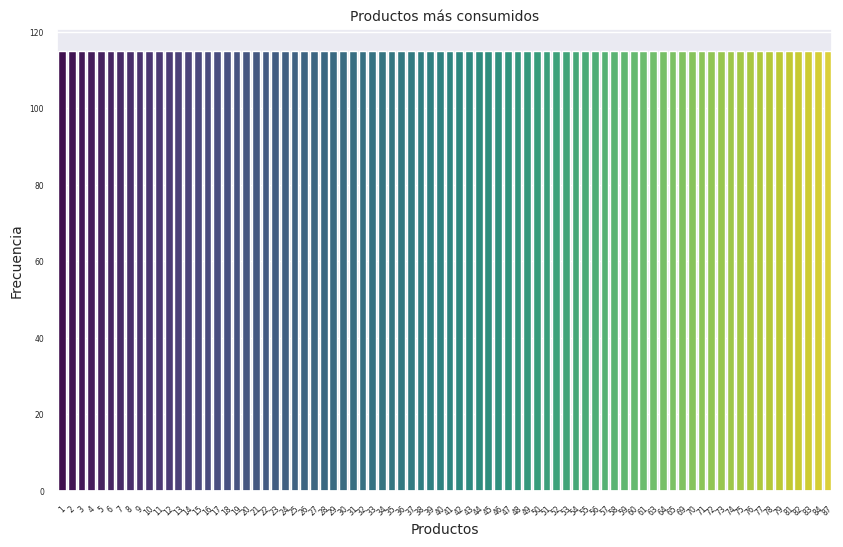

In [200]:
# Volvemos a verificar gráficamente
plt.figure(figsize=(10, 6))
sns.countplot(data=X_resampled_under, x=y_resampled_under, palette='viridis')
plt.xlabel('Productos', fontsize=10)
plt.ylabel('Frecuencia', fontsize=10)
plt.title('Productos más consumidos', fontsize=10)
plt.xticks(rotation=45)
plt.show()

<p align = "justify">
Ahora tenemos 10.005 filas, con 115 valores por clase. Esto significa que si bien el dataset ha perdido aproximadamente 3/4 de la información original, esta correctamente balanceado para ser entrenado.
</p>

### **5.2** <u>**Segunda ronda de reducción de la dimensionalidad**</u>
<p align = "justify">
Ya con un conjunto de datos más ligero vamos a volver a probar la técnica de reducción de la dimensionalidad aplicada anteriormente por medio de "SequentialFeatureSelector". La idea en esta segunda ronda es aumentar la cantidad de variables incluidas.<br><br>
En este caso probaremos con 9 variables, contra 5 que incluimos en la primera ronda. Recordemos que esto se debía directamente a la cantidad de recursos computacionales utilizados, que en nuestro caso particular hacían muy alto de el tiempo de ejecución del proceso.
</p>

In [201]:
# Creamos el segundo clasificador Random Forest
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Creamos el segundo selector de características secuenciales, esta vez con 9 variables
sfs2 = SequentialFeatureSelector(rf_classifier2, k_features=9, forward=True, verbose=2, scoring='accuracy', cv=3, n_jobs=-1)

# Realizamos la selección de características en nuestro nuevo conjunto de datos
sfs2.fit(X_resampled_under, y_resampled_under)

# Obtenemos el segunde set de características seleccionadas con sus nombres originales
selected_feature_indices2 = sfs2.k_feature_idx_
selected_feature_names2 = x.columns[list(selected_feature_indices2)]

# Creamos un nuevo DataFrame con las características seleccionadas
x2 = X_resampled_under[selected_feature_names2]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.1min finished

[2023-10-22 14:55:42] Features: 1/9 -- score: 0.43945700476557015[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   40.5s finished

[2023-10-22 14:56:22] Features: 2/9 -- score: 0.4613048313688357[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   32.2s finished

[2023-10-22 14:56:55] Features: 3/9 -- score: 0.48902179795114303[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   34.9s finished

[2023-10-22 14:57:30] Features: 4/9 -- score: 0.49576150753062737[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   43.2s finished

[

In [202]:
# Observamos el nuevo conjunto de datos de variables independientes
x2

,transaction_id,sales_outlet_id,staff_id,customer_id,line_item_id,line_item_amount,unit_price,minute,second
0,0.085911,0.0,0.205128,0.000000,0.000000,0.050000,0.389140,0.881356,0.372881
1,0.033367,0.4,0.536016,0.593353,0.090909,0.077384,0.389140,0.503996,0.423684
2,0.150425,1.0,0.967502,0.000000,0.000000,0.050000,0.389140,0.381753,0.285579
3,0.016515,0.0,0.261631,0.033978,0.000000,0.050000,0.389140,0.691815,0.159445
4,0.146953,0.4,0.567513,0.000000,0.000000,0.050000,0.389140,0.902813,0.184100
...,...,...,...,...,...,...,...,...,...
9195,0.156116,1.0,0.974359,0.955535,0.000000,0.016667,0.049774,0.525424,0.067797
9196,0.374166,1.0,0.230769,0.959175,0.000000,0.009441,0.049774,0.257673,0.690525
9197,0.157348,0.4,0.541065,0.629591,0.000000,0.006129,0.029412,0.622216,0.241591
9198,0.102570,1.0,0.974359,0.999059,0.090909,0.005833,0.029412,0.237288,0.491525


In [203]:
# Observamos el nuevo conjunto de datos de la variable objetivo
y_resampled_under

0        1
1        1
2        1
3        1
4        1
        ..
9195    87
9196    87
9197    87
9198    87
9199    87
Name: product_id, Length: 9200, dtype: int64

<p align = "justify">
De lo anterior, se pueden realizar las siguientes observaciones:

- La medida de evaluación de rendimiento de nuestro modelo aumentó su exactitud de (accuracy_1 = 0.3661497531479836) a (accuracy_2 = 0.532065560813925), O sea de 36,6% a 53,2%. Esto es un aumento de un 45,31%. Nuevamente recordemos que estamos trabajando con 1/4 de los datos originales.

- La cantidad de instancias de los conjuntos de datos ha disminuido. La razón por la que la cantidad de muestras en el conjuntos de datos porque durante el proceso de selección de características es posible que algunas muestras se eliminen si están asociadas con características que se consideran menos relevantes según el criterio de evaluación utilizado. Esto es un hecho al que hay que prestarle mucha atención, ya que puede impactar en la capacidad de predicción del modelo de algunas clases de la variable objetivo.

A continuación vamos a realizar una ronda de "GridSearch" para ver si se puede mejorar la puntuación anterior.
</p>

In [204]:
# Definimos nuevovamente el clasificador RandomForestClassifier
rf_classifier_2 = RandomForestClassifier()

# Definimos los hiperparámetros y sus valores a explorar
param_grid_2 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creamos el nuevo objeto RandomizedSearchCV
random_search_2 = RandomizedSearchCV(rf_classifier_2, param_distributions=param_grid_2, n_iter=10, scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Ajustamos el modelo en los datos del dataset balanceado y reducido
random_search_2.fit(X_resampled_under, y_resampled_under)

# Imprimimos los mejores hiperparámetros y puntaje del mejor modelo
print("Mejores hiperparámetros:", random_search_2.best_params_)
print("Mejor puntaje:", random_search_2.best_score_)

Mejores hiperparámetros: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Mejor puntaje: 0.5356525528685195


<p align = "justify">
Vemos como resultado:

Mejores Hiperparámetros:

- n_estimators: 200: Este es el número de árboles en el bosque. En este caso, se encontró que utilizar 200 árboles es la mejor opción.
- min_samples_split: 2: Este parámetro especifica el número mínimo de muestras requeridas para dividir un nodo interno. Se encontró que dividir un nodo con al menos 2 muestras es la mejor opción.
- min_samples_leaf: 2: Este parámetro especifica el número mínimo de muestras requeridas para que un nodo sea una hoja (nodo terminal). Se encontró que tener al menos 2 muestras en las hojas es la mejor opción.
- max_depth: None: Este parámetro controla la profundidad máxima de los árboles. En este caso, no se estableció ninguna profundidad máxima, lo que significa que los árboles pueden crecer hasta que contengan un número mínimo de muestras en las hojas (min_samples_leaf).

Mejor Puntaje: (0.5341305891975637)
Este es el puntaje (en este caso, exactitud) alcanzado por el modelo con la combinación de hiperparámetros mencionada anteriormente.<br><br>
En terminos generales el puntaje subió en un 0,38% desde el ejemplo anterior. Dado que este aumento es despreciable, vamos a seguir adelante con los hiperparámetros anteriores.
</p>

### **5.3** <u>**Rentrenamiento del algoritmo de clasificación**</u>
<p align = "justify">
Con el nuevo conjunto de datos obtenidos vamos a proceder a una segunda ronda de entrenamiento de nuestro modelo de clasificación.
</p>

In [205]:
# Apuntamos la varibale "y2" a nuestra nueva variable objetivo
y2 = y_resampled_under

# Dividimos el nuevo conjunto de datos obtenido en entrenamiento y prueba
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Creamos un segundo clasificador Random Forest
rf_classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo en los datos de entrenamiento
rf_classifier2.fit(x_train2, y_train2)

# Realizamos predicciones en los datos de prueba
y_pred2 = rf_classifier2.predict(x_test2)

In [206]:
# A partir de los valores anteriores vamos a calcular los distintos puntajes del modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculo_metricas(y_true, y_pred):
    # Calculamos la exactitud (Accuracy)
    accuracy2 = accuracy_score(y_true, y_pred)

    # Calculamos la matriz de confusión
    cm2 = confusion_matrix(y_true, y_pred)

    # Calculamos la precisión (Precision) promedio ponderado
    precision2 = precision_score(y_true, y_pred, average='weighted')

    # Calculamos el recall (Recall o Sensibilidad) promedio ponderado
    recall2 = recall_score(y_true, y_pred, average='weighted')

    # Calculamos la puntuación F1 promedio ponderado
    f1_2 = f1_score(y_true, y_pred, average='weighted')

    return {
        "Accuracy_2": accuracy2,
        "Precision_2": precision2,
        "Recall_2 (Sensibilidad)": recall2,
        "F1 Score_2": f1_2
    }

# Llamamos a la función con los datos anteriores
scores = calculo_metricas(y_test2, y_pred2)

# Imprimimos los puntajes
print("Los puntajes del modelo son:")
for metric, score in scores.items():
    print(f"{metric}: {score:.2f}")


Los puntajes del modelo son:
Accuracy_2: 0.53
Precision_2: 0.54
Recall_2 (Sensibilidad): 0.53
F1 Score_2: 0.53


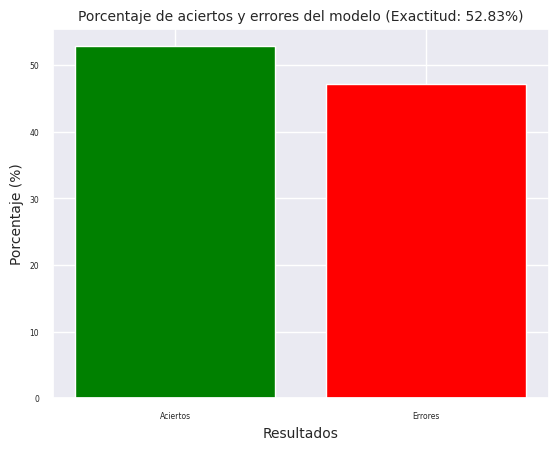

In [207]:
# Creamos una segunda gráfica de barras para mostrar los resultados  porcentuales respecto al puntage de accuracy obtenido
accuracy_2 = accuracy_score(y_test2, y_pred2)

# Calculamos el porcentaje de aciertos y errores
total_samples = len(y_test2)
percentage_correct = accuracy_2 * 100
percentage_incorrect = (1 - accuracy_2) * 100

# Creamos una gráfica de barras para mostrar los aciertos y errores en términos porcentuales
labels = ['Aciertos', 'Errores']
percentages = [percentage_correct, percentage_incorrect]

plt.bar(labels, percentages, color=['green', 'red'])
plt.xlabel('Resultados', fontsize=10)
plt.ylabel('Porcentaje (%)', fontsize=10)
plt.title('Porcentaje de aciertos y errores del modelo (Exactitud: {:.2f}%)'.format(accuracy_2 * 100), fontsize=10)
plt.show()

<p align = "justify">
En esta segunda ronda de entrenamiento del modelo hemos podido observar como el balanceo de las clases de la variable objetivo ha influido positivamente en el puntaje seleccionado (accuracy aumentada en casi un 40%). El resto de los puntajes calculados no varían considerablemente con el anterior.<br><br>
Si bien, nuevamente se destaca el hecho de la reducción de las instancias del modelo en gran medida. podrían plantearse dos preguntas interesantes: primero, sería intentar comprobar como se comporta el modelo para el caso del balanceo de clases aplicando una técnica de oversampling. Y segundo, teniendo en cuenta el aumento del puntaje, que es más importante para nuestro problema de selección en sí, tener muchas instancias sin balanceo o pocas balanceadas?
</p>

## **6** <u>**Ingeniería de atributos y seleccion de variables**</u>
<p align = "justify">
En la presente sección vamos a intentar crear nuevas variables sintéticas para mejorar el desempeño de nuestro modelo. Además, vamos a probar varios tipos de algoritmos de clasificación y en base a sus respectivos puntajes seleccionaremos el mejor. Finalmente probaremos la técnica de reducción de la dimensionalidad PCA "Análisis de Componentes Principales", para encontrar las variables que más contribuyen al mejoramiento de nuestro modelo.
</p>

### **6.1** <u>**Creación de nuevas variables sintéticas**</u>
<p align = "justify">
A partir del dataset anterior "x2" obtuvimos 9 variables producto de las técnicas de reducción de dimensionalidad. Si bien, en secciones anteriores creamos las variables sintéticas "year", "month",	"day",	"hour",	"minute", "second", a partir de las variables "transaction_date" y "transaction_time", vamos a crear una nueva.<br><br>
Con el motivo de capturar mejor la relación existente entre el tipo de producto y su precio unitario vamos a crear una nueva variable- A partir de "unit_price" (precio unitario de cada artículo), vamos a crear la variable "Rel_Price" (precio relativo). Esta representa la diferencia porcentual del precio unitario de cada producto en relación con el promedio de su categoría.
</p>

In [208]:
# Partamos de nuestro conjuntos de datos "x2" y "y2". Los vamos a fusionar temporalmente en un solo DataFrame "x2a"
x2a = pd.concat([x2, y2], axis=1)

# Calculamos el promedio relativo
x2a['Promedio_Relativo'] = (x2a['unit_price'] - x2a.groupby('product_id')['unit_price'].transform('mean')) / x2a.groupby('product_id')['unit_price'].transform('mean')

In [209]:
# Chequeamos la existencia de valores nulos producto de la creación de nuestra nueva variable
x2a.isna().sum()

transaction_id         0
sales_outlet_id        0
staff_id               0
customer_id            0
line_item_id           0
line_item_amount       0
unit_price             0
minute                 0
second                 0
product_id             0
Promedio_Relativo    460
dtype: int64

In [210]:
# Dado que tenemos valores nulos que no podremos entrenar en los modelos procedemos a eliminarlos y verificar
x2a = x2a.dropna()
x2a.isna().sum()

transaction_id       0
sales_outlet_id      0
staff_id             0
customer_id          0
line_item_id         0
line_item_amount     0
unit_price           0
minute               0
second               0
product_id           0
Promedio_Relativo    0
dtype: int64

In [211]:
# Separamos nuevamente los conjuntos
y3 = pd.DataFrame(x2a['product_id'])
x3 = x2a.drop('product_id', axis=1)


### **6.2** <u>**Prueba de distintos modelos**</u>
<p align = "justify">
En esta sección vamos a probar nuestros conjuntos datos con distintos modelos para ver cual obtiene el mejor equilibrio entre "Bias-Variance tradeoff". Es decir, intercambio sesgo-varianza:<br><br>

- **El sesgo (Bias)**: El sesgo se refiere a la simplificación excesiva de un modelo, lo que puede hacer que el modelo no capture relaciones complejas en los datos de entrenamiento. Un modelo con alto sesgo tiende a subajustar los datos y tiene un rendimiento deficiente tanto en los datos de entrenamiento como en los de prueba.

- **La varianza (Variance)**: La varianza se refiere a la sensibilidad excesiva de un modelo a pequeñas variaciones en los datos de entrenamiento. Un modelo con alta varianza tiende a sobreajustar los datos de entrenamiento y tiene un buen rendimiento en los datos de entrenamiento pero un rendimiento deficiente en datos de prueba no vistos.<br><br>

El "Bias-Variance tradeoff" implica encontrar un equilibrio entre estos dos aspectos. En términos simples, se trata de evitar que un modelo sea demasiado simple (sesgado) o demasiado complejo (alta varianza). En lugar de buscar el modelo perfecto, se busca un modelo que sea lo suficientemente complejo como para capturar las relaciones importantes en los datos, pero no tan complejo como para ajustarse demasiado a las particularidades del conjunto de entrenamiento.<br><br>
Para nuestro preyecto en particular vamos a analizar los algoritmos de machine learning que pretendemos utilizar son:

- Regresión Logística
- Random Forest
- Gradient Boosting
- Máquinas de Soporte Vectorial

Por otra parte las métricas con las cuales se evaluará cada uno de los anteriores serán:
- Accuracy
- Precisión
- Recall
- F1 Score"
</p>

In [212]:
# Primero llamamos a las librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Luego, creamos una función para mostrar los modelos y sus puntuaciones correspondientes
def evaluar_modelos(x, y):
    # Dividir los datos en conjuntos de entrenamiento y prueba
    x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

    # Lista de modelos que a evaluar
    modelos = [
        ('Regresión Logística', LogisticRegression(max_iter=1000)),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('SVM', SVC())
    ]

    # Diccionario para almacenar los resultados
    resultados = {}

    for nombre, modelo in modelos:
        # Entrenamos el modelo
        modelo.fit(x3_train, y3_train)

        # Realizamos predicciones
        y3_pred = modelo.predict(x3_test)

        # Calculamos las métricas
        accuracy3 = accuracy_score(y3_test, y3_pred)
        precision3 = precision_score(y3_test, y3_pred, average='weighted')  # Promedio ponderado
        recall3 = recall_score(y3_test, y3_pred, average='weighted')  # Promedio ponderado
        f1_3 = f1_score(y3_test, y3_pred, average='weighted')  # Promedio ponderado

        # Almacenamos los resultados en el diccionario
        resultados[nombre] = {
            'Accuracy': accuracy3,
            'Precision': precision3,
            'Recall': recall3,
            'F1 Score': f1_3
        }

        # Imprimimos los resultados
        print(f"Resultados del modelo '{nombre}':")
        print(f"Accuracy: {accuracy3}")
        print(f"Precisión: {precision3}")
        print(f"Recall: {recall3}")
        print(f"F1 Score: {f1_3}\n")

    return resultados

# Llamamos a la función con nuestros conjuntos de datos "x3" e "y3"
resultados = evaluar_modelos(x3, y3)


Resultados del modelo 'Regresión Logística':
Accuracy: 0.07208237986270023
Precisión: 0.06297398985173319
Recall: 0.07208237986270023
F1 Score: 0.05654124861313248

Resultados del modelo 'Random Forest':
Accuracy: 0.6287185354691075
Precisión: 0.6317731588193634
Recall: 0.6287185354691075
F1 Score: 0.6265107334963944

Resultados del modelo 'Gradient Boosting':
Accuracy: 0.5949656750572082
Precisión: 0.5975609027494508
Recall: 0.5949656750572082
F1 Score: 0.5937399858629356

Resultados del modelo 'SVM':
Accuracy: 0.13272311212814644
Precisión: 0.13656162153603943
Recall: 0.13272311212814644
F1 Score: 0.12129329566562455



<p align = "justify">
En el resultado anterior vemos que:

- El modelo de Regresión Logística muestra un bajo rendimiento en todas las métricas. La precisión, recall y F1 Score son significativamente bajos, lo que sugiere que el modelo tiene dificultades para clasificar correctamente las muestras. Esto podría indicar un alto sesgo (bias) en el modelo, es decir, el modelo no es lo suficientemente complejo para capturar la relación entre las características de entrada y la variable objetivo.

- El modelo Random Forest muestra un rendimiento considerablemente mejor en todas las métricas en comparación con la Regresión Logística. Tiene una precisión, recall y F1 Score más altos, lo que sugiere que es capaz de clasificar las muestras con mayor precisión. Esto podría indicar un mejor equilibrio entre sesgo y varianza en comparación con la Regresión Logística.

- El modelo Gradient Boosting también muestra un rendimiento sólido en todas las métricas, similar al Random Forest. Tiene una precisión, recall y F1 Score altos, lo que indica que es capaz de clasificar las muestras de manera efectiva. En términos de sesgo-varianza, podría estar en un nivel similar al Random Forest.

- El modelo SVM muestra un rendimiento más bajo en comparación con los otros dos modelos (Random Forest y Gradient Boosting). Tiene una precisión, recall y F1 Score significativamente más bajos. Esto podría sugerir un alto sesgo en el modelo o que el modelo no es adecuado para este problema específico.

En conclusión, en términos del balance "bias-variance tradeoff" parece ser que los algoritmos Random Forest y Gradient Boosting muestran un mejor equilibrio entre sesgo y varianza, con un rendimiento más sólido en todas las métricas, mientras que la SVM parece tener un sesgo más alto en este contexto debido a su bajo rendimiento. Por este motivo vamos a seguir utilizando "Random Forest"
</p>

### **6.3** <u>**Análisis de Componentes Principales (PCA)**</u>
<p align = "justify">
La técnica "PCA" es una técnica de reducción de dimensionalidad que se utiliza para transformar un conjunto de datos con muchas variables en un conjunto de datos con menos variables (llamadas componentes principales) mientras se conserva la mayor cantidad posible de información. PCA logra esto al identificar las direcciones (componentes principales) en las que los datos muestran la mayor variabilidad.
Dicho lo anterior, nuestra tarea será la de analizar los dos primeros componentes producto de la aplicación de la técnica a nuestro conjunto de datos de entrada
</p>

In [219]:
# Primero, separamos los conjuntos de datos en entrenamiento y prueba
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)
# Luego, procedemos a aplicar PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
x3_train = pca.fit_transform(x3_train)
x3_test = pca.transform(x3_test)

In [220]:
# Explicación de la varianza de las componentes
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.41927227, 0.15430371, 0.12655327, 0.11759024, 0.05746283])

El resultado muestra que el primer componente  explica el 41,92% de la variabilidad de los datos, el segundo el 15.43%, y asi sucesivamente. Veamos el valor de las métricas implemntando un modelo de "Random Forest" para las dos componentes utilizadas.

In [221]:
# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(x3_train, y3_train)

# Predicción
y3_pred = model_rf.predict(x3_test)

In [222]:
# Las métricas del modelo son:
accuracy3a = accuracy_score(y3_test, y3_pred)
precision3a = precision_score(y3_test, y3_pred, average='weighted')  # Promedio ponderado
recall3a = recall_score(y3_test, y3_pred, average='weighted')  # Promedio ponderado
f1_3a = f1_score(y3_test, y3_pred, average='weighted')  # Promedio ponderado

print("Las métricas del modelo son del modelo")
print(f"Accuracy: {accuracy3a}")
print(f"Precisión: {precision3a}")
print(f"Recall: {recall3a}")
print(f"F1 Score: {f1_3a}\n")

Las métricas del modelo son del modelo
Accuracy: 0.02745995423340961
Precisión: 0.013861080715059022
Recall: 0.02745995423340961
F1 Score: 0.010713624690560135



<p align = "justify">
Después de aplicar la técnica de reducción de dimensionalidad PCA a nuestro conjunto de datos y utilizar 5 componentes principales como características, evaluamos nuestro modelo de Random Forest. Aquí están las métricas resultantes:

- **Accuracy (Precisión):** Nuestro modelo tiene una precisión del 2.74%. Esto significa que aproximadamente el 2.74% de nuestras predicciones son correctas en comparación con todas las predicciones realizadas por el modelo. Desafortunadamente, la mayoría de las predicciones son incorrectas.

- **Precisión:** La precisión es aún más baja, alrededor del 1,38%. Esto indica que solo el 1,38% de las predicciones positivas realizadas por el modelo son verdaderamente positivas. Es decir, nuestro modelo tiende a cometer muchos falsos positivos.

- **Recall (Recuperación):** El recall también es bajo, alrededor del 2,74%. Esto significa que solo se identifican correctamente el 2,74% de las muestras positivas reales en nuestros datos. El modelo no logra identificar la mayoría de las muestras positivas.

- **F1 Score:** El F1 Score, que combina precisión y recall, es muy bajo, aproximadamente 1,07%. Esto sugiere que nuestro modelo tiene un rendimiento deficiente tanto en términos de precisión como de recall.

En resumen, los resultados indican que nuestro modelo de Random Forest con PCA y 5 componentes principales no funciona bien en nuestro conjunto de datos. Tiene dificultades para realizar predicciones precisas y tiende a clasificar incorrectamente la mayoría de las muestras. Esto podría deberse a la reducción drástica de la dimensionalidad, que puede haber causado la pérdida de información crucial para la clasificación. Podríamos considerar ajustar el número de componentes principales o explorar otras técnicas de reducción de dimensionalidad para mejorar el rendimiento del modelo en futuros experimentos.
</p>

## **7** <u>**CrossValidation e Hypertuning**</u>
<p align = "justify">
A continuación vamos a tratar de mejorar la puntuación obtenida en la sección anterior. En vista de lo anterior vamos a seleccionar el algoritmo "Random Forest" dado que con este se consiguió el mejor conjunto de métricas para nuestro problema de Machine Learning. En primer lugar, mejorar aún más el conjunto obtenido, vamos a recurrir a un método de validación cruzada. Luego, dependiendo de los resultados obtenidos vamos a utilizar algún método de mejoramiento de hiperparámetros para intentar mejorar aún más el rendimiento de nuestro modelo.
</p>

### **7.1** <u>**Método "Stratified K-Fold Cross Validation"**</u>
<p align = "justify">
En nuestro caso particular la estrategia seleccionada para Cross Validation será "Stratified K-Fold Cross Validation". La razón principal para elegir "Stratified K-Fold Cross Validation" es que asegura que las proporciones de las 87 clases de "product_id" sean aproximadamente las mismas en cada fold. Dadas las múltiples clases y es importante que el modelo se entrene y evalúe de manera equitativa en todas ellas, la estratificación ayuda a evitar desequilibrios en la distribución de clases en los conjuntos de entrenamiento y prueba. Nuevamente, por medio de la librería "sklearn", vamos a importar la clase "StratifiedKFold" para llevar a cabo lo anterior.
</p>

In [217]:
# Primero importamos la clase
from sklearn.model_selection import StratifiedKFold, train_test_split

# Luego, para ordenarnos, volvemos a dividir los datos en conjuntos de entrenamiento y prueba
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Definimos el número de folds (10 en este caso)
n_splits = 10

# Inicializamos StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Creamos listas para almacenar las métricas de rendimiento en cada fold
accuracy_scores_cv = []
precision_scores_cv = []
recall_scores_cv = []
f1_scores_cv = []

# Modelo Random Forest
model_rf_cv = RandomForestClassifier()

# Iteramos sobre los folds
for train_index, test_index in stratified_kfold.split(x_train_cv, y_train_cv):
    X_train_fold, X_test_fold = x_train_cv.iloc[train_index], x_train_cv.iloc[test_index]
    y_train_fold, y_test_fold = y_train_cv.iloc[train_index], y_train_cv.iloc[test_index]

    # Entrenamos el modelo en X_train_fold y y_train_fold
    model_rf_cv.fit(X_train_fold, y_train_fold)

    # Realizamos las predicciones en X_test_fold
    y_pred_cv = model_rf_cv.predict(X_test_fold)

    # Calculamos las métricas y las almacenamos
    accuracy = accuracy_score(y_test_fold, y_pred_cv)
    precision = precision_score(y_test_fold, y_pred_cv, average='weighted')
    recall = recall_score(y_test_fold, y_pred_cv, average='weighted')
    f1 = f1_score(y_test_fold, y_pred_cv, average='weighted')

    accuracy_scores_cv.append(accuracy)
    precision_scores_cv.append(precision)
    recall_scores_cv.append(recall)
    f1_scores_cv.append(f1)

# Calculamos los promedios de las métricas
average_accuracy = sum(accuracy_scores_cv) / len(accuracy_scores_cv)
average_precision = sum(precision_scores_cv) / len(precision_scores_cv)
average_recall = sum(recall_scores_cv) / len(recall_scores_cv)
average_f1 = sum(f1_scores_cv) / len(f1_scores_cv)

# Mostramos en la salida
print(f"Accuracy promedio en {n_splits} folds: {average_accuracy}")
print(f"Precisión promedio en {n_splits} folds: {average_precision}")
print(f"Recall promedio en {n_splits} folds: {average_recall}")
print(f"F1-score promedio en {n_splits} folds: {average_f1}")



Accuracy promedio en 10 folds: 0.6005405681585939
Precisión promedio en 10 folds: 0.6020988005032241
Recall promedio en 10 folds: 0.6005405681585939
F1-score promedio en 10 folds: 0.5973633486983798


<p align = "justify">

<p align = "justify">
Podemos ver que mediante el uso de Stratified K-Fold Cross Validation, obtuvimos resultados ligeramente inferiores en términos de métricas promedio en comparación con el modelo utilizado en la sección "6.2", sin validación cruzada. Esto se debe a que la validación cruzada realiza un proceso de partición de datos en múltiples conjuntos de entrenamiento y prueba, lo que puede llevar a una ligera reducción en el rendimiento promedio en comparación con entrenar y evaluar el modelo en todo el conjunto de datos.
</p>

### **7.2** <u>**Hypertuning Parameters**</u>
<p align = "justify">
La optimización de hiper parámetros en el aprendizaje automático, tiene por objeto encontrar los hiper parámetros de un determinado algoritmo de aprendizaje automático que ofrezcan el mejor rendimiento medido en un conjunto de validación.<br><br>
Para este proceso de optimización, dado que los resultados de las métricas de la seccion anterior son inferiores a los de la seccion "6.2", volveremos a dividir los datos de esta (sin k fold) en nuevos conjuntos de entrenamiento y prueba. Entonces,adoptando un enfoque más exploratorio vamos a utilizar "Randomized Search" para explorar una amplia gama de valores de hiperparámetros. Esto lo vamos a hacer importando la clase "RandomizedSearchCV" de la librería que venimos utilizando "sklearn".
</p>

In [218]:
# Importamos la clase y las métricas
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

# Definimos un rango amplio de valores para los hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None] + list(np.arange(2, 20, 2)),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Creamos el clasificador Random Forest
rf = RandomForestClassifier(random_state=0)

# Definimos nuevamente las métricas personalizadas para RandomizedSearchCV, en un diccionario
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision_weighted': make_scorer(precision_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted'),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Inicializamos RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=5, scoring=scoring, refit='accuracy', random_state=42)

# Luego, volvemos a dividir los datos de la sección "6.2" en conjuntos de entrenamiento y prueba
x_train_hyp, x_test_hyp, y_train_hyp, y_test_hyp = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Realizamos la búsqueda aleatorizada en los datos de entrenamiento
random_search.fit(x_train_hyp, y_train_hyp)

# Almacenamos los mejores hiperparámetros encontrados
best_params = random_search.best_params_

# Generamos el mejor modelo entrenado con los mejores hiperparámetros
best_rf_model = random_search.best_estimator_

# Evalúamos el modelo en el conjunto de prueba y finalmente obtenemos las métricas
y_pred_test_hyp = best_rf_model.predict(x_test_hyp)
accuracy_test = accuracy_score(y_test_hyp, y_pred_test_hyp)
precision_test = precision_score(y_test_hyp, y_pred_test_hyp, average='weighted')
recall_test = recall_score(y_test_hyp, y_pred_test_hyp, average='weighted')
f1_test = f1_score(y_test_hyp, y_pred_test_hyp, average='weighted')

print("Mejores hiperparámetros encontrados:", best_params)
print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Precisión en el conjunto de prueba: {precision_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")


Mejores hiperparámetros encontrados: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 18}
Accuracy en el conjunto de prueba: 0.6138443935926774
Precisión en el conjunto de prueba: 0.6211128999996108
Recall en el conjunto de prueba: 0.6138443935926774
F1-score en el conjunto de prueba: 0.6122087720179785


<p align = "justify">
En la sección ya citada (6.2 Prueba de distintos modelos)  de nuestro proyecto, implementamos un modelo de clasificación utilizando Random Forest sin ajuste de hiperparámetros, lo que nos proporcionó resultados iniciales decentes en términos de métricas de rendimiento. Los resultados originales del modelo 'Random Forest' fueron los siguientes:

- Accuracy: 0.6293
- Precisión: 0.6345
- Recall: 0.6293
- F1 Score: 0.6297

Sin embargo, considerando los métodos de optimización de hiperparámetros, se entendió que aún había margen para mejorar el rendimiento de nuestro modelo. Por lo tanto, aplicamos Randomized Search para encontrar la combinación óptima de hiperparámetros para nuestro modelo. Después de la búsqueda aleatorizada, obtuvimos los siguientes resultados de los hiperparámetros:

- Mejores hiperparámetros encontrados: **{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}**

Luego, los aplicamos en el modelo "best_rf_model", de esta forma las métricas fueron:

- Accuracy en el conjunto de prueba: 0.6138
- Precisión en el conjunto de prueba: 0.6211
- Recall en el conjunto de prueba: 0.6138
- F1-score en el conjunto de prueba: 0.6122<br><br>

Al comparar estos resultados con nuestros resultados originales, observamos que el modelo ajustado con Randomized Search muestra una ligera disminución en algunas métricas, como el accuracy, la precisión y el recall, en comparación con el modelo inicial. Sin embargo, la diferencia en el rendimiento es mínima, lo que indica que nuestro modelo original ya estaba bastante bien ajustado.<br><br>
Es importante destacar que, aunque no logramos una mejora significativa en el rendimiento, la ventaja de aplicar Randomized Search radica en que hemos explorado sistemáticamente un rango amplio de hiperparámetros en busca de mejoras, lo que podría ser beneficioso en casos más complejos, y constituye un modelo más sólido. Además, hemos obtenido una configuración de hiperparámetros más óptima para nuestro modelo que puede ser útil en situaciones futuras.
</p>

## **8** <u>**Conclusión Final**</u>
<p align = "justify">
En resumen, el proyecto logró desarrollar un modelo de machine learning basado en "Random Forest" para predecir el tipo de producto en las transacciones comerciales. Sin embargo, a pesar de los esfuerzos de ingeniería de características y optimización, las métricas de rendimiento del modelo (accuracy, precisión, recall, F1-score) siguieron siendo moderadas. Esto podría deberse a 3 factores fundamentalmente: la complejidad del problema, la falta de datos más descriptivos y además que se cuenta con recursos computacionales escasos para el procesamiento y búsqueda de los anteriores.<br><br>
En futuros trabajos, se podría explorar la posibilidad de obtener datos adicionales o aplicar técnicas más avanzadas de modelado, como redes neuronales, para mejorar el rendimiento del modelo. Además, se recomienda evaluar la posibilidad de crear más variables sintéticas, y repetir los procesos de validación cruzada y la búsqueda de hiperparámetros, dado que son pasos esenciales para garantizar que el modelo sea lo más robusto posible en un contexto de machine learning.
</p>